In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [6]:
from scipy import stats

In [7]:
from scipy.stats import zscore

In [8]:
import ast

In [9]:
import re

In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

IMOPRT THE DATASET ONE BY ONE

In [13]:
chennai_df = pd.read_excel("C:/Users/anand/Desktop/CarDekho Prediction Project Files/chennai_cars.xlsx")
hyderabad_df = pd.read_excel("C:/Users/anand/Desktop/CarDekho Prediction Project Files/hyderabad_cars.xlsx")
jaipur_df = pd.read_excel("C:/Users/anand/Desktop/CarDekho Prediction Project Files/jaipur_cars.xlsx")
delhi_df = pd.read_excel("C:/Users/anand/Desktop/CarDekho Prediction Project Files/delhi_cars.xlsx")
bangalore_df = pd.read_excel("C:/Users/anand/Desktop/CarDekho Prediction Project Files/bangalore_cars.xlsx")
kolkata_df = pd.read_excel("C:/Users/anand/Desktop/CarDekho Prediction Project Files/kolkata_cars.xlsx")

In [14]:
chennai_df['city'] = 'Chennai'
hyderabad_df['city'] = 'Hyderabad'
jaipur_df['city'] = 'Jaipur'
delhi_df['city'] = 'Delhi'
bangalore_df['city'] = 'Bangalore'
kolkata_df['city'] = 'Kolkata'

CONCATENATE THE ALL CITY DATASET IN SINGLE DF

In [16]:
all_cities_df = pd.concat([chennai_df, hyderabad_df, jaipur_df, delhi_df, bangalore_df, kolkata_df], ignore_index=True)

In [17]:
all_cities_df

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,city
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Chennai
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Chennai
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Chennai
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Chennai
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Chennai
...,...,...,...,...,...,...
8364,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata
8365,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata
8366,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata
8367,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata


 TO DROP THE CAR_LINK COLUMNS 

In [19]:
all_cities_df = all_cities_df.drop(['car_links'], axis=1)

 CONVERT THE STRING FORMAT DATA INTO DICTIONARY [LIKE 'DETAILS', 'OVERVIEW', 'FEATURE', 'SPECIFICATION']
  AND NEW CAR DETAILS TO GET FLATTENED DATAFRAME IN JSON

In [21]:
all_cities_df['new_car_detail'] = all_cities_df['new_car_detail'].apply(ast.literal_eval)
all_cities_df['new_car_overview'] = all_cities_df['new_car_overview'].apply(ast.literal_eval)
all_cities_df['new_car_feature'] = all_cities_df['new_car_feature'].apply(ast.literal_eval)
all_cities_df['new_car_specs'] = all_cities_df['new_car_specs'].apply(ast.literal_eval)

In [22]:
details = pd.json_normalize(all_cities_df['new_car_detail'])
details.head(1)

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc
0,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,8654,Turbo DCT Anniversary Edition,₹ 11.50 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days


In [23]:
all_cities_df['new_car_overview'][0]

{'heading': 'Car overview',
 'top': [{'key': 'Registration Year',
   'value': '2022',
   'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/registrationYear.svg'},
  {'key': 'Insurance Validity',
   'value': 'Third Party insurance',
   'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/insuranceValidity.svg'},
  {'key': 'Fuel Type',
   'value': 'Petrol',
   'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/fuel.svg'},
  {'key': 'Seats',
   'value': '5 Seats',
   'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/seats.svg'},
  {'key': 'Kms Driven',
   'value': '20,000 Kms',
   'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/kmsDriven.svg'},
  {'key': 'RTO',
   'value': 'TN02',
   'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/rto.svg'},
  {'key': 'Ownership',
   'value': 'First Owner',
   'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/ownership.svg'},
  {'key': 'Engine Displacement',
   'value': '998 cc',
   'icon': 'https://images10.gaadi.com/listing/v

 NEW CAR OVERVIEW DATA WHICH IS INSIDE IN "TOP"[ "KEY", "VALUE"]

In [25]:
def process_row(row):
    row_data = {item['key']: item['value'] for item in row['top']}
    return row_data

overview_car = all_cities_df['new_car_overview'].apply(lambda row: pd.Series(process_row(row)))
overview_car

,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture
0,2022,Third Party insurance,Petrol,5 Seats,"20,000 Kms",TN02,First Owner,998 cc,Automatic,2022.0
1,Feb 2015,Comprehensive,Petrol,7 Seats,"20,687 Kms",TN04,First Owner,1196 cc,Manual,2015.0
2,2021,Third Party insurance,Petrol,5 Seats,"30,000 Kms",TN22,First Owner,999 cc,Manual,2021.0
3,May 2015,Comprehensive,Petrol,5 Seats,"59,247 Kms",TN11,First Owner,1086 cc,Manual,2015.0
4,2015,Third Party insurance,Petrol,5 Seats,"50,000 Kms",KA03,First Owner,1199 cc,Manual,2015.0
...,...,...,...,...,...,...,...,...,...,...
8364,2022,Third Party insurance,Petrol,5 Seats,"10,000 Kms",NaN,First Owner,998 cc,Manual,2022.0
8365,2014,Third Party insurance,Petrol,5 Seats,"1,20,000 Kms",NaN,First Owner,796 cc,Manual,2014.0
8366,2011,Third Party insurance,Petrol,5 Seats,"50,000 Kms",WB06,Third Owner,1796 cc,Automatic,2011.0
8367,2012,Third Party insurance,Petrol,5 Seats,"40,000 Kms",NaN,First Owner,1197 cc,Manual,2012.0


In [26]:
overview_car.head(1)

,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture
0,2022,Third Party insurance,Petrol,5 Seats,"20,000 Kms",TN02,First Owner,998 cc,Automatic,2022.0


In [27]:
all_cities_df['new_car_feature'][0]

{'heading': 'Features',
 'top': [{'value': 'Power Steering'},
  {'value': 'Power Windows Front'},
  {'value': 'Air Conditioner'},
  {'value': 'Heater'},
  {'value': 'Adjustable Head Lights'},
  {'value': 'Fog Lights Front'},
  {'value': 'Anti Lock Braking System'},
  {'value': 'Brake Assist'},
  {'value': 'Radio'}],
 'data': [{'heading': 'Comfort & Convenience',
   'subHeading': 'Comfort',
   'list': [{'value': 'Power Steering'},
    {'value': 'Power Windows Front'},
    {'value': 'Power Windows Rear'},
    {'value': 'Low Fuel Warning Light'},
    {'value': 'Accessory Power Outlet'},
    {'value': 'Trunk Light'},
    {'value': 'Rear Reading Lamp'},
    {'value': 'Rear Seat Headrest'},
    {'value': 'Rear Seat Centre Arm Rest'},
    {'value': 'Cup Holders Rear'},
    {'value': 'Multifunction Steering Wheel'},
    {'value': 'Cruise Control'},
    {'value': 'Rear ACVents'},
    {'value': 'Smart Access Card Entry'},
    {'value': 'Engine Start Stop Button'},
    {'value': 'Steering Wheel G

THE ABOVE DICTIONARY COLUMN OF NEW_CAR_FEATURE TO EXTRACT THE DATA IN "TOP" & "DATA"
TO GET THE NEW_FEATURES DICTIONARY

In [29]:
def process_features(row):
    features = {}

    for item in row['top']:
        features[item['value']] = True

    for data_item in row.get('data', []):
        for sub_item in data_item.get('list', []):
            features[sub_item['value']] = True

    return features

features_car = all_cities_df['new_car_feature'].apply(lambda row: pd.Series(process_features(row)))
features_car.head(1)

,Power Steering,Power Windows Front,Air Conditioner,Heater,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Brake Assist,Radio,Power Windows Rear,...,Dual Tone Body Colour,Active Noise Cancellation,Power Folding3rd Row Seat,Roof Carrier,Compass,Lane Watch Camera,Mirror Link,Removable Convertible Top,Headlamp Washers,Smart Key Band
0,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


TO GET THE NEW_CAR_SPECIFICATION

In [31]:
all_cities_df['new_car_specs'][0]

{'heading': 'Specifications',
 'top': [{'key': 'Engine', 'value': '998 CC'},
  {'key': 'Max Power', 'value': '118.36bhp'},
  {'key': 'Torque', 'value': '172nm'},
  {'key': 'Wheel Size', 'value': '16'},
  {'key': 'Seats', 'value': '5'}],
 'data': [{'heading': 'Engine and Transmission',
   'subHeading': 'Engine',
   'list': [{'key': 'Color', 'value': 'Black'},
    {'key': 'Engine Type', 'value': 'Smartstream G1.0 T - GDi'},
    {'key': 'Displacement', 'value': '998'},
    {'key': 'Max Power', 'value': '118.36bhp@6000rpm'},
    {'key': 'Max Torque', 'value': '172nm@1500-4000rpm'},
    {'key': 'No of Cylinder', 'value': 3},
    {'key': 'Values per Cylinder', 'value': 4},
    {'key': 'Fuel Suppy System', 'value': 'GDi'},
    {'key': 'Turbo Charger', 'value': 'Yes'}]},
  {'heading': 'Dimensions & Capacity',
   'subHeading': 'Dimensions',
   'list': [{'key': 'Length', 'value': '3995mm'},
    {'key': 'Width', 'value': '1790'},
    {'key': 'Height', 'value': '1642'},
    {'key': 'Wheel Base', '

In [32]:
def process_specifications(row):
    specs = {}

    for item in row['top']:
        specs[item['key']] = [item['value']]

    for data_item in row.get('data', []):
        for sub_item in data_item.get('list', []):
            specs[sub_item['key']] = [sub_item['value']]

    return specs

specification_car = all_cities_df['new_car_specs'].apply(lambda row: pd.Series(process_specifications(row)))
specification_car.head(1)

,Engine,Max Power,Torque,Wheel Size,Seats,Color,Engine Type,Displacement,Max Torque,No of Cylinder,...,Compression Ratio,Super Charger,Front Tread,Rear Tread,Gross Weight,Turning Radius,Top Speed,Acceleration,BoreX Stroke,Ground Clearance Unladen
0,[998 CC],[118.36bhp@6000rpm],[172nm],[16],[5],[Black],[Smartstream G1.0 T - GDi],[998],[172nm@1500-4000rpm],[3],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
Combined_cars_df = pd.concat([details, overview_car, features_car, specification_car, all_cities_df['city']], axis=1)

In [34]:
Combined_cars_df.to_excel('Combined_cars_df_full.xlsx', index=False)

Data Processing

In [36]:
df = pd.read_excel('Combined_cars_df_full.xlsx')
df.head(5)

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Super Charger,Front Tread,Rear Tread,Gross Weight,Turning Radius,Top Speed,Acceleration,BoreX Stroke,Ground Clearance Unladen,city
0,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chennai
1,0,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,2015,...,['No'],['1280mm'],['1290mm'],['1540kg'],['4.5 metres'],['145 Kmph'],['15.7 Seconds'],NaN,NaN,Chennai
2,0,Petrol,SUV,"30,000",Manual,1,1st Owner,Nissan,Nissan Magnite,2021,...,['No'],NaN,NaN,NaN,['5.0'],NaN,['11.7'],['72.2 x 81.3'],NaN,Chennai
3,0,Petrol,Hatchback,"59,247",Manual,1,1st Owner,Hyundai,Hyundai i10,2015,...,['No'],['1400mm'],['1385mm'],NaN,['4.7 metres'],['165 Kmph'],['14.3 Seconds'],NaN,NaN,Chennai
4,0,Petrol,Hatchback,"50,000",Manual,1,1st Owner,Honda,Honda Jazz,2015,...,['No'],NaN,NaN,NaN,['5.1 meters'],['172 Kmph'],['13.7 Seconds'],NaN,NaN,Chennai


In [37]:
threshold = len(df) * 0.5
df.dropna(axis=1, thresh=threshold,inplace=True)

print(df.nunique())
df = df.loc[:, df.nunique() > 1]

print(df.duplicated().sum())
df.drop_duplicates(keep='first',inplace=True)   
print(df.duplicated().sum())

it                   1
ft                   5
bt                  10
km                4090
transmission         2
                  ... 
Rear Tread         200
Turning Radius     196
Top Speed          305
Acceleration       332
city                 6
Length: 122, dtype: int64
85
0


In [38]:
columns_to_drop = ['priceActual', 'Front Tread', 'Seats', 'Kms Driven', 'Registration Year', 'centralVariantId', 'Kerb Weight', 'Max Power', 'Engine', 'Wheel Size', 'Seats.1', 'Length', 'Width', 'Max Torque', 'Height', 'Wheel Base', 'Values per Cylinder', 'Alloy Wheel Size', 'Cargo Volumn', 'Value Configuration', 'Rear Tread', 'Top Speed', 'Turning Radius', 'Acceleration', 'priceSaving', 'priceFixedText', 'trendingText.imgUrl', 'trendingText.heading', 'trendingText.desc', 'Power Steering', 'Power Windows Front', 'Heater', 'Adjustable Head Lights', 'Fog Lights Front', 'Anti Lock Braking System', 'Brake Assist', 'Radio', 'Power Windows Rear', 'Low Fuel Warning Light', 'Accessory Power Outlet', 'Trunk Light', 'Rear Reading Lamp', 'Rear Seat Headrest', 'Rear Seat Centre Arm Rest', 'Cup Holders Rear', 'Multifunction Steering Wheel', 'Cruise Control', 'Rear ACVents', 'Smart Access Card Entry', 'Engine Start Stop Button', 'Steering Wheel Gearshift Paddles', 'Battery Saver', 'Drive Modes', 'Remote Engine Start Stop', 'Adjustable Headrest', 'Adjustable Steering', 'Digital Odometer', 'Electronic Multi Tripmeter', 'Leather Seats', 'Fabric Upholstery', 'Leather Steering Wheel', 'Glove Compartment', 'Digital Clock', 'Driving Experience Control Eco', 'Height Adjustable Driver Seat', 'Leather Wrap Gear Shift Selector', 'Power Adjustable Exterior Rear View Mirror', 'Electric Folding Rear View Mirror', 'Rear Window Defogger', 'Integrated Antenna', 'Tinted Glass', 'Rear Spoiler', 'Sun Roof', 'Moon Roof', 'Outside Rear View Mirror Turn Indicators', 'Chrome Grille', 'Roof Rail', 'LEDDRLs', 'LEDHeadlights', 'LEDTaillights', 'Centeral Locking', 'Power Door Locks', 'Child Safety Locks', 'Driver Air Bag' 'Passenger Air Bag', 'Side Air Bag Front', 'Day Night Rear View Mirror', 'Passenger Side Rear View Mirror', 'Rear Seat Belts', 'Seat Belt Warning', 'Vehicle Stability Control System', 'Traction Control', 'Adjustable Seats', 'Keyless Entry', 'Engine Check Warning', 'Crash Sensor', 'Automatic Head Lamps', 'Ebd', 'Follow Me Home Headlamps', 'Rear Camera', 'Anti Pinch Power Windows', 'Speed Sensing Auto Door Lock', 'Isofix Child Seat Mounts', 'Pretensioners And Force Limiter Seatbelts', 'Hill Assist', 'Impact Sensing Auto Door Lock', 'No Of Airbags', 'Eletronic Stability Control', 'Speakers Front', 'Speakers Rear', 'Integrated2Din Audio', 'Bluetooth', 'Touch Screen', 'Number Of Speaker', 'Apple Car Play', 'Android Auto', 'Manually Adjustable Exterior Rear View Mirror', 'Wheel Covers', 'Halogen Headlamps', 'Side Impact Beams', 'Front Impact Beams', 'Centrally Mounted Fuel Tank', 'Engine Immobilizer', 'Height Adjustable Front Seat Belts', 'Cup Holders Front', 'Seat Lumbar Support', 'Voice Control', 'Gear Shift Indicator', 'Luggage Hook And Net', 'Tachometer', 'Outside Temperature Display', 'Dual Tone Dashboard', 'Rear Window Wiper', 'Automatic Driving Lights', 'LEDFog Lamps', 'Projector Headlamps', 'Anti Theft Alarm', 'Door Ajar Warning', 'Tyre Pressure Monitor', 'Anti Theft Device', 'View360Camera', 'Touch Screen Size', 'Wifi Connectivity', 'Cd Player', 'Remote Fuel Lid Opener', 'Vanity Mirror', 'Power Antenna', 'Usb Auxiliary Input', 'Air Quality Control', 'Navigation System', 'Lane Change Indicator', 'Rear Window Washer', 'Chrome Garnish', 'Dvd Player', 'Remote Trunk Opener', 'Cigarette Lighter', 'Rain Sensing Wiper', 'Smoke Headlamps', 'Xenon Headlamps', 'Cd Changer', 'Glove Box Cooling', 'Tailgate Ajar', 'Blind Spot Monitor', 'Hill Descent Control', 'Internal Storage', 'Wireless Phone Charging', 'Remote Climate Control', 'Find My Car Location', 'Cornering Headlamps', 'Clutch Lock', 'Sos Emergency Assistance', 'Speed Alert', 'Geo Fence Alert', 'Audio System Remote Control', 'Real Time Vehicle Tracking', 'Power Boot', 'Hands Free Tailgate', 'Ventilated Seats', 'Fog Lights Rear', 'Side Stepper', 'Heated Wing Mirror', 'Knee Airbags', 'Side Air Bag Rear', 'Steering Mounted Tripmeter', 'Rear Folding Table', 'Cornering Foglamps', 'Remote Horn Light Control', 'Cassette Player', 'Heads Up Display', 'Rear Entertainment System', 'Dual Tone Body Colour', 'Active Noise Cancellation', 'Power Folding3rd Row Seat', 'Roof Carrier', 'Compass', 'Lane Watch Camera', 'Mirror Link', 'Removable Convertible Top', 'Headlamp Washers', 'Smart Key Band', 'Max Torque', 'Length', 'Width', 'Height',  'Value Configuration', 'Compression Ratio', 'Gross Weight', 'Turning Radius', 'BoreX Stroke', 'Ground Clearance Unladen', 'Alloy Wheel Size']
df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

In [39]:
print(df.columns.tolist())

['ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem', 'model', 'modelYear', 'variantName', 'price', 'Insurance Validity', 'Fuel Type', 'RTO', 'Ownership', 'Engine Displacement', 'Transmission', 'Year of Manufacture', 'Torque', 'Color', 'Engine Type', 'Displacement', 'No of Cylinder', 'Fuel Suppy System', 'Turbo Charger', 'Gear Box', 'Drive Type', 'Seating Capacity', 'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type', 'No Door Numbers', 'Mileage', 'Super Charger', 'city']


In [40]:
df.head(2)

,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,variantName,...,Drive Type,Seating Capacity,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,Mileage,Super Charger,city
0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,Turbo DCT Anniversary Edition,...,['FWD'],['5'],['Electric'],['Disc'],['Drum'],"['Tubeless, Radial']",['5'],NaN,NaN,Chennai
1,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,2015,7 Seater Standard BSIV,...,['RWD'],['7'],['Manual'],['Ventilated Disc'],['Drum'],['Tubeless Tyres'],['5'],['15.37 kmpl'],['No'],Chennai


In [41]:
df.dtypes

ft                      object
bt                      object
km                      object
transmission            object
ownerNo                  int64
owner                   object
oem                     object
model                   object
modelYear                int64
variantName             object
price                   object
Insurance Validity      object
Fuel Type               object
RTO                     object
Ownership               object
Engine Displacement     object
Transmission            object
Year of Manufacture    float64
Torque                  object
Color                   object
Engine Type             object
Displacement            object
No of Cylinder          object
Fuel Suppy System       object
Turbo Charger           object
Gear Box                object
Drive Type              object
Seating Capacity        object
Steering Type           object
Front Brake Type        object
Rear Brake Type         object
Tyre Type               object
No Door 

PRICE

In [43]:
def convert_price(price_str):
    price_str = str(price_str)
    price_str = re.sub(r'[₹,]', '',price_str).strip()

    if 'Crore' in price_str:
        price_str = price_str.replace('Crore', '').strip()
        return float(price_str) * 10000000
    
    elif 'Lakh' in price_str:
       price_str = price_str.replace('Lakh', '').strip()
       return float(price_str) * 100000

    elif 'Thousand' in price_str:
       price_str = price_str.replace('Thousand', '').strip()
       return float(price_str) * 1000

    else:
       return float(price_str)

df['price'] = df['price'].apply(convert_price)

In [44]:
df['price']

0       1150000.0
1        415000.0
2        750000.0
3        398000.0
4        550000.0
          ...    
8364     510000.0
8365     180000.0
8366     550000.0
8367     140000.0
8368     500000.0
Name: price, Length: 8284, dtype: float64

KMS

In [46]:
def convert_km(km_str):
    if km_str is None or isinstance(km_str, float) and np.isnan(km_str):
        return np.nan
    
    km_str = str(km_str)
    km_str = re.sub(r',', '',km_str).strip()
    return float(km_str)

df['km'] = df['km'].apply(convert_km)

In [47]:
df['km']

0        20000.0
1        20687.0
2        30000.0
3        59247.0
4        50000.0
          ...   
8364     10000.0
8365    120000.0
8366     50000.0
8367     40000.0
8368    120000.0
Name: km, Length: 8284, dtype: float64

MILEAGE

In [49]:
def clean_mileage(value):
    if pd.isna(value):
        return np.nan

    value = str(value).strip().lower()

    if 'km/kg' in value:
        numeric_value = re.sub(r'[^\d.]', '',value)
        if numeric_value and numeric_value!= '.':
           value_float = float(numeric_value) * 0.74
           return value_float
        else:
            return np.nan

    else:
        numeric_value = re.sub(r'[^\d.]', '',value)
        if numeric_value and numeric_value!= '.':
           return float(numeric_value)
        else:
            return np.nan

df['Mileage'] = df['Mileage'].apply(clean_mileage)

In [50]:
df['Mileage']

0         NaN
1       15.37
2       20.00
3       19.81
4       18.70
        ...  
8364    25.24
8365    22.74
8366    11.74
8367    18.50
8368    19.72
Name: Mileage, Length: 8284, dtype: float64

In [51]:
df.head(2)

,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,variantName,...,Drive Type,Seating Capacity,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,Mileage,Super Charger,city
0,Petrol,SUV,20000.0,Automatic,1,1st Owner,Kia,Kia Sonet,2022,Turbo DCT Anniversary Edition,...,['FWD'],['5'],['Electric'],['Disc'],['Drum'],"['Tubeless, Radial']",['5'],NaN,NaN,Chennai
1,Petrol,Minivans,20687.0,Manual,1,1st Owner,Maruti,Maruti Eeco,2015,7 Seater Standard BSIV,...,['RWD'],['7'],['Manual'],['Ventilated Disc'],['Drum'],['Tubeless Tyres'],['5'],15.37,['No'],Chennai


In [52]:
# Calculate the mean and round it using Python's built-in round() function
mean_mileage = round(df['Mileage'].mean(), 2)

# Fill NaN values with the rounded mean
df['Mileage'] = df['Mileage'].fillna(mean_mileage)

# Clean and fill 'Displacement' values
df['Displacement'] = df['Displacement'].apply(lambda x: float(str(x).strip("[]'")) if pd.notna(x) else np.nan)
median_displacement = df['Displacement'].median()
df['Displacement'] = df['Displacement'].fillna(median_displacement)

# Clean and fill 'No of Cylinder' values
df['No of Cylinder'] = df['No of Cylinder'].apply(lambda x: float(str(x).strip("[]'")) if pd.notna(x) else np.nan)
median_cylinders = df['No of Cylinder'].median()
df['No of Cylinder'] = df['No of Cylinder'].fillna(median_cylinders)

# Fill NaN values with the mode for 'Seating Capacity'
seating_capacity_mode = df['Seating Capacity'].mode()
if not seating_capacity_mode.empty:
    df['Seating Capacity'] = df['Seating Capacity'].fillna(seating_capacity_mode[0])
else:
    df['Seating Capacity'] = df['Seating Capacity'].fillna(df['Seating Capacity'].mean())

# Check for the existence of 'No Door Numbers' and fill NaN values
if 'No Door Numbers' in df.columns:
    no_door_mode = df['No Door Numbers'].mode()
    if not no_door_mode.empty:
        df['No Door Numbers'] = df['No Door Numbers'].fillna(no_door_mode[0])
    else:
        df['No Door Numbers'] = df['No Door Numbers'].fillna(df['No Door Numbers'].mode()[0])
else:
    print("Column 'No Door Numbers' does not exist in the DataFrame.")

In [53]:
df.shape

(8284, 36)

In [54]:
df.isna().sum()

ft                        0
bt                        4
km                        0
transmission              0
ownerNo                   0
owner                     0
oem                       0
model                     0
modelYear                 0
variantName               0
price                     0
Insurance Validity        4
Fuel Type                 0
RTO                     874
Ownership                32
Engine Displacement       4
Transmission              0
Year of Manufacture      20
Torque                   60
Color                     3
Engine Type             290
Displacement              0
No of Cylinder            0
Fuel Suppy System      1708
Turbo Charger          1029
Gear Box                106
Drive Type             1540
Seating Capacity          0
Steering Type           254
Front Brake Type         96
Rear Brake Type          96
Tyre Type                77
No Door Numbers           0
Mileage                   0
Super Charger          1938
city                

In [55]:
df.dtypes

ft                      object
bt                      object
km                     float64
transmission            object
ownerNo                  int64
owner                   object
oem                     object
model                   object
modelYear                int64
variantName             object
price                  float64
Insurance Validity      object
Fuel Type               object
RTO                     object
Ownership               object
Engine Displacement     object
Transmission            object
Year of Manufacture    float64
Torque                  object
Color                   object
Engine Type             object
Displacement           float64
No of Cylinder         float64
Fuel Suppy System       object
Turbo Charger           object
Gear Box                object
Drive Type              object
Seating Capacity        object
Steering Type           object
Front Brake Type        object
Rear Brake Type         object
Tyre Type               object
No Door 

In [56]:
def remove_outliers(df, columns, z_thresh=3):
    for column in columns:
        z_scores = stats.zscore(df[column])

        df = df[abs(z_scores) < (z_thresh)]

    return df

columns_to_check = ['km', 'modelYear', 'Displacement', 'Mileage', 'price']
df_outliers_removed = remove_outliers(df, columns_to_check)
df_outliers_removed        

,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,variantName,...,Drive Type,Seating Capacity,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,Mileage,Super Charger,city
0,Petrol,SUV,20000.0,Automatic,1,1st Owner,Kia,Kia Sonet,2022,Turbo DCT Anniversary Edition,...,['FWD'],['5'],['Electric'],['Disc'],['Drum'],"['Tubeless, Radial']",['5'],19.23,NaN,Chennai
1,Petrol,Minivans,20687.0,Manual,1,1st Owner,Maruti,Maruti Eeco,2015,7 Seater Standard BSIV,...,['RWD'],['7'],['Manual'],['Ventilated Disc'],['Drum'],['Tubeless Tyres'],['5'],15.37,['No'],Chennai
2,Petrol,SUV,30000.0,Manual,1,1st Owner,Nissan,Nissan Magnite,2021,Turbo XV Premium BSVI,...,NaN,['5'],['Electronic'],['Disc'],['Drum'],"['Tubeless,Radial']",['5'],20.00,['No'],Chennai
3,Petrol,Hatchback,59247.0,Manual,1,1st Owner,Hyundai,Hyundai i10,2015,Sportz 1.1L,...,['FWD'],['5'],['Power'],['Ventilated Disc'],['Drum'],['Tubeless'],['5'],19.81,['No'],Chennai
4,Petrol,Hatchback,50000.0,Manual,1,1st Owner,Honda,Honda Jazz,2015,1.2 VX i VTEC,...,['FWD'],['5'],['Power'],['Disc'],['Drum'],"['Tubeless,Radial']",['5'],18.70,['No'],Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Petrol,Hatchback,10000.0,Manual,1,1st Owner,Maruti,Maruti Celerio,2022,ZXI BSVI,...,NaN,['5'],['Electric'],['Ventilated Disc'],['Drum'],"['Tubeless, Radial']",['5'],25.24,NaN,Kolkata
8365,Petrol,Hatchback,120000.0,Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,LXI,...,['FWD'],['5'],['Power'],['Solid Disc'],['Drum'],['Tubeless Tyres'],['5'],22.74,['No'],Kolkata
8366,Petrol,Sedan,50000.0,Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,C 200 CGI Elegance,...,['RWD'],['5'],['Power'],['Ventilated Disc'],['Solid Disc'],"['Tubeless,Radial']",['4'],11.74,['No'],Kolkata
8367,Petrol,Hatchback,40000.0,Manual,1,1st Owner,Maruti,Maruti Ritz,2012,ZXi,...,['FWD'],['5'],['Power'],['Ventilated Disc'],['Drum'],"['Tubeless,Radial']",['5'],18.50,['No'],Kolkata


In [57]:
df_outliers_removed.shape

(7776, 36)

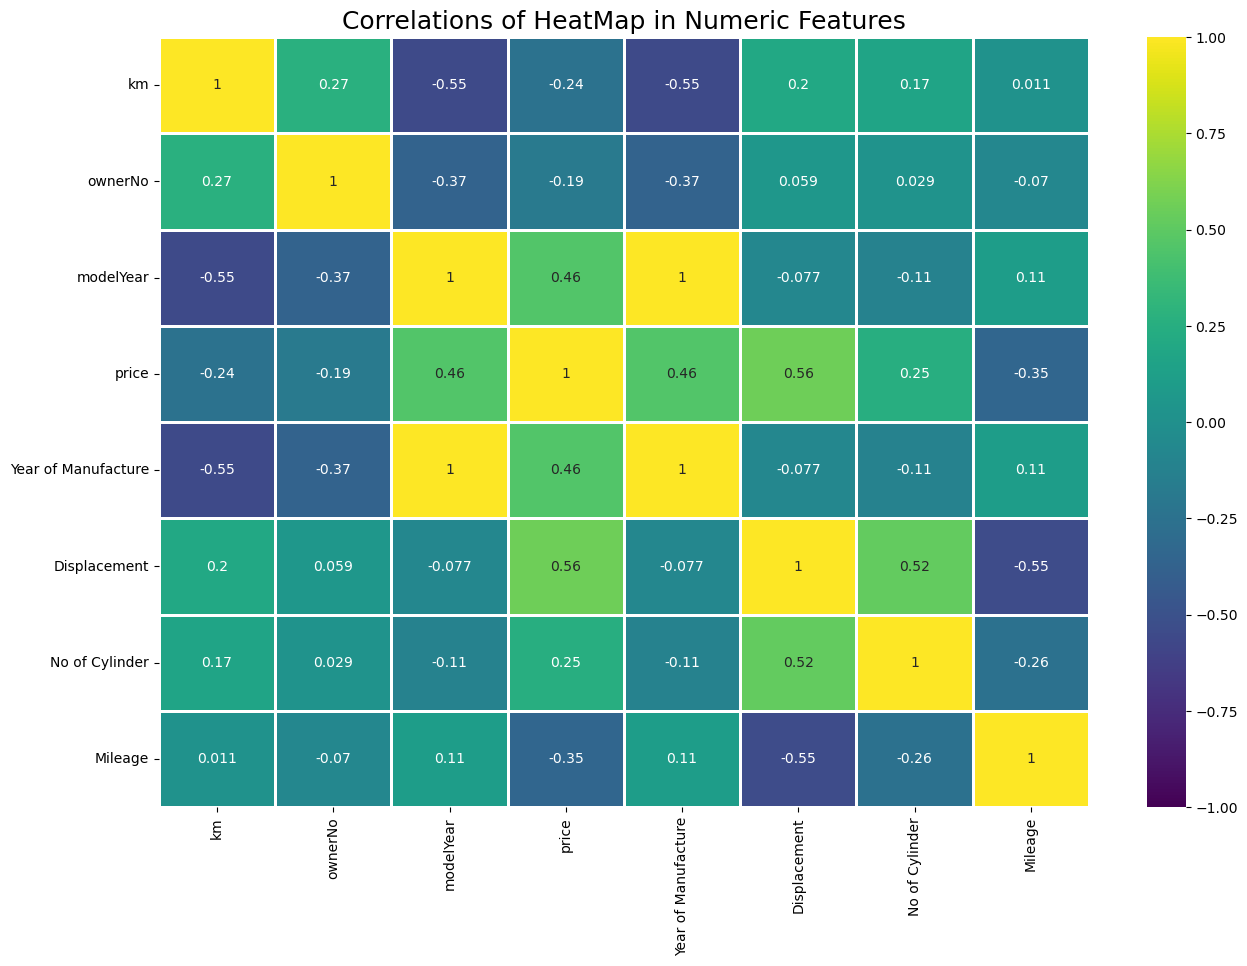

'Price' Value in Correlations:
km                    -0.243118
ownerNo               -0.186916
modelYear              0.456043
price                  1.000000
Year of Manufacture    0.456043
Displacement           0.557017
No of Cylinder         0.252360
Mileage               -0.349549
Name: price, dtype: float64


In [58]:
numeric_cols_df = df_outliers_removed.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_cols_df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, linecolor='white', linewidths=1)
plt.title('Correlations of HeatMap in Numeric Features', fontsize=18)
plt.show()

price_corr = corr_matrix['price']


print("'Price' Value in Correlations:")
print(price_corr)

C:\Users\anand\AppData\Local\Temp\ipykernel_19784\1785840111.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_corr.index, y=price_corr.values, palette='PiYG')


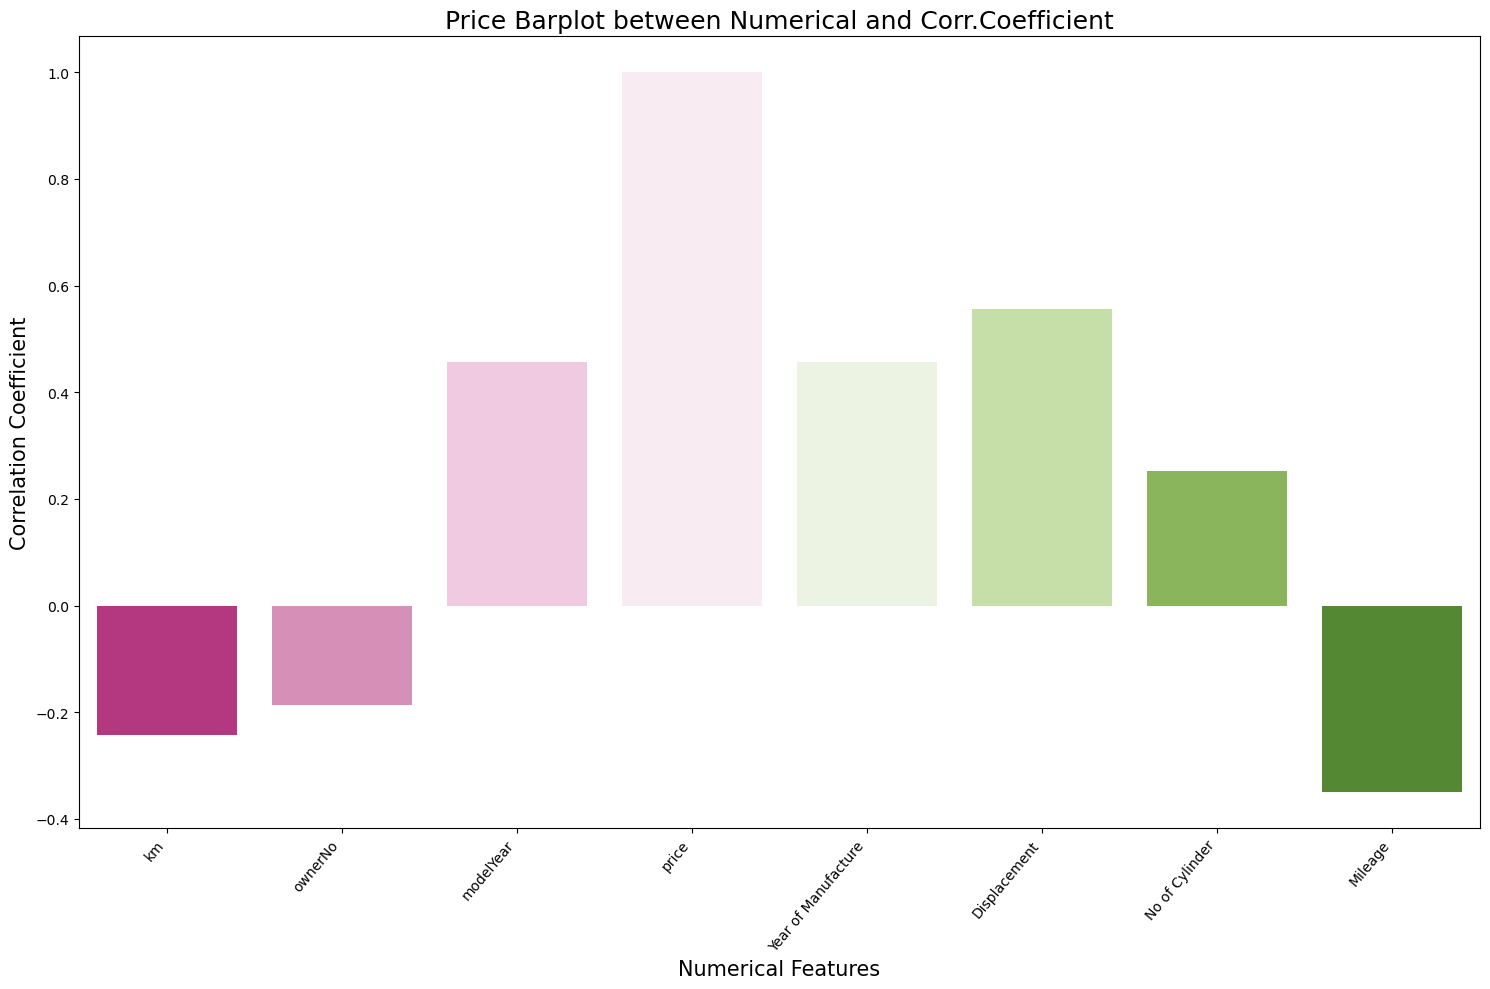

In [59]:
plt.figure(figsize=(15,10))
sns.barplot(x=price_corr.index, y=price_corr.values, palette='PiYG')
plt.title('Price Barplot between Numerical and Corr.Coefficient', fontsize=18)
plt.xlabel('Numerical Features', fontsize=15)
plt.ylabel('Correlation Coefficient', fontsize=15)
plt.xticks(rotation=50, ha='right')
plt.tight_layout()
plt.show()

In [60]:
columns_to_drop = ['Seating Capacity', 'No Door Numbers', 'No of Cylinder']
columns_existing = [col for col in columns_to_drop if col in df_outliers_removed.columns]

if columns_existing:
    df_outliers_removed.drop(columns_existing, axis=1, inplace=True)
else:
    print("Columns not found:", [col for col in columns_to_drop if col not in df_outliers_removed.columns])

In [61]:
df_outliers_removed

,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,variantName,...,Turbo Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,Mileage,Super Charger,city
0,Petrol,SUV,20000.0,Automatic,1,1st Owner,Kia,Kia Sonet,2022,Turbo DCT Anniversary Edition,...,['Yes'],['7-Speed DCT'],['FWD'],['Electric'],['Disc'],['Drum'],"['Tubeless, Radial']",19.23,NaN,Chennai
1,Petrol,Minivans,20687.0,Manual,1,1st Owner,Maruti,Maruti Eeco,2015,7 Seater Standard BSIV,...,['No'],['5 Speed'],['RWD'],['Manual'],['Ventilated Disc'],['Drum'],['Tubeless Tyres'],15.37,['No'],Chennai
2,Petrol,SUV,30000.0,Manual,1,1st Owner,Nissan,Nissan Magnite,2021,Turbo XV Premium BSVI,...,['Yes'],['5 Speed'],NaN,['Electronic'],['Disc'],['Drum'],"['Tubeless,Radial']",20.00,['No'],Chennai
3,Petrol,Hatchback,59247.0,Manual,1,1st Owner,Hyundai,Hyundai i10,2015,Sportz 1.1L,...,['No'],['5 Speed'],['FWD'],['Power'],['Ventilated Disc'],['Drum'],['Tubeless'],19.81,['No'],Chennai
4,Petrol,Hatchback,50000.0,Manual,1,1st Owner,Honda,Honda Jazz,2015,1.2 VX i VTEC,...,['No'],['5 Speed'],['FWD'],['Power'],['Disc'],['Drum'],"['Tubeless,Radial']",18.70,['No'],Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Petrol,Hatchback,10000.0,Manual,1,1st Owner,Maruti,Maruti Celerio,2022,ZXI BSVI,...,NaN,['5-Speed'],NaN,['Electric'],['Ventilated Disc'],['Drum'],"['Tubeless, Radial']",25.24,NaN,Kolkata
8365,Petrol,Hatchback,120000.0,Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,LXI,...,['No'],['5 Speed'],['FWD'],['Power'],['Solid Disc'],['Drum'],['Tubeless Tyres'],22.74,['No'],Kolkata
8366,Petrol,Sedan,50000.0,Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,C 200 CGI Elegance,...,['No'],['7 Speed'],['RWD'],['Power'],['Ventilated Disc'],['Solid Disc'],"['Tubeless,Radial']",11.74,['No'],Kolkata
8367,Petrol,Hatchback,40000.0,Manual,1,1st Owner,Maruti,Maruti Ritz,2012,ZXi,...,['No'],['5 Speed'],['FWD'],['Power'],['Ventilated Disc'],['Drum'],"['Tubeless,Radial']",18.50,['No'],Kolkata


Fuel System - FT

In [63]:
df_outliers_removed['ft'].value_counts()

ft
Petrol      5311
Diesel      2357
Cng           68
Electric      24
Lpg           16
Name: count, dtype: int64

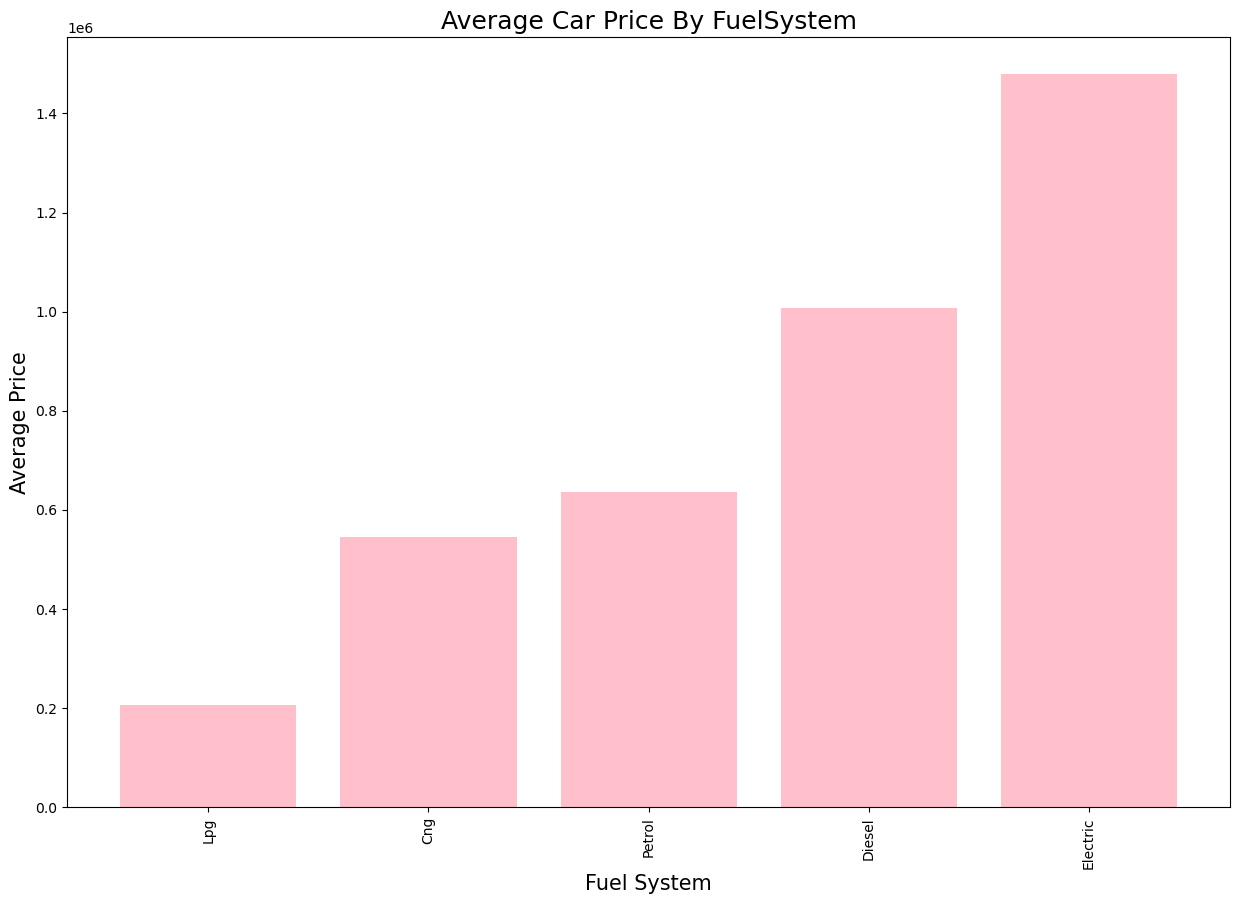

In [64]:
#Replace this with your DataFrame and relevant columns
average_prices = df_outliers_removed.groupby('ft')['price'].mean().sort_values()

# Create the plot
plt.figure(figsize=(15,10))

# Plot the bar chart with a single color
plt.bar(average_prices.index, average_prices.values, color='pink')  

# Set titles and labels
plt.title('Average Car Price By FuelSystem', fontsize=18)
plt.xlabel('Fuel System', fontsize=15)
plt.ylabel('Average Price', fontsize=15)
plt.xticks(rotation=90)
plt.show()

Body Type - BT

In [66]:
df_outliers_removed['bt'].value_counts()

bt
Hatchback        3478
Sedan            1993
SUV              1933
MUV               341
Minivans           19
Pickup Trucks       5
Coupe               2
Wagon               1
Convertibles        1
Name: count, dtype: int64

In [67]:
# we can either combine the last 4 categories into one 'others' category or just drop those rows 
df_outliers_removed['bt']= df_outliers_removed['bt'].replace('Pickup Trucks','Other')
df_outliers_removed['bt']= df_outliers_removed['bt'].replace('Coupe','Other')
df_outliers_removed['bt']= df_outliers_removed['bt'].replace('Convertibles','Other')
df_outliers_removed['bt']= df_outliers_removed['bt'].replace('Wagon','Other')
# here we combined the Pickup Trucks, Coupe, Convertibles, Wagon categories into 'Other'

print(df_outliers_removed['bt'].value_counts())

bt
Hatchback    3478
Sedan        1993
SUV          1933
MUV           341
Minivans       19
Other           9
Name: count, dtype: int64


In [68]:
print(df_outliers_removed['bt'].isna().sum())
df_outliers_removed = df_outliers_removed.dropna(subset='bt')
print(df_outliers_removed['bt'].isna().sum())

3
0


C:\Users\anand\AppData\Local\Temp\ipykernel_19784\1244917173.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bt', y='price', data=average_prices, palette='deep')


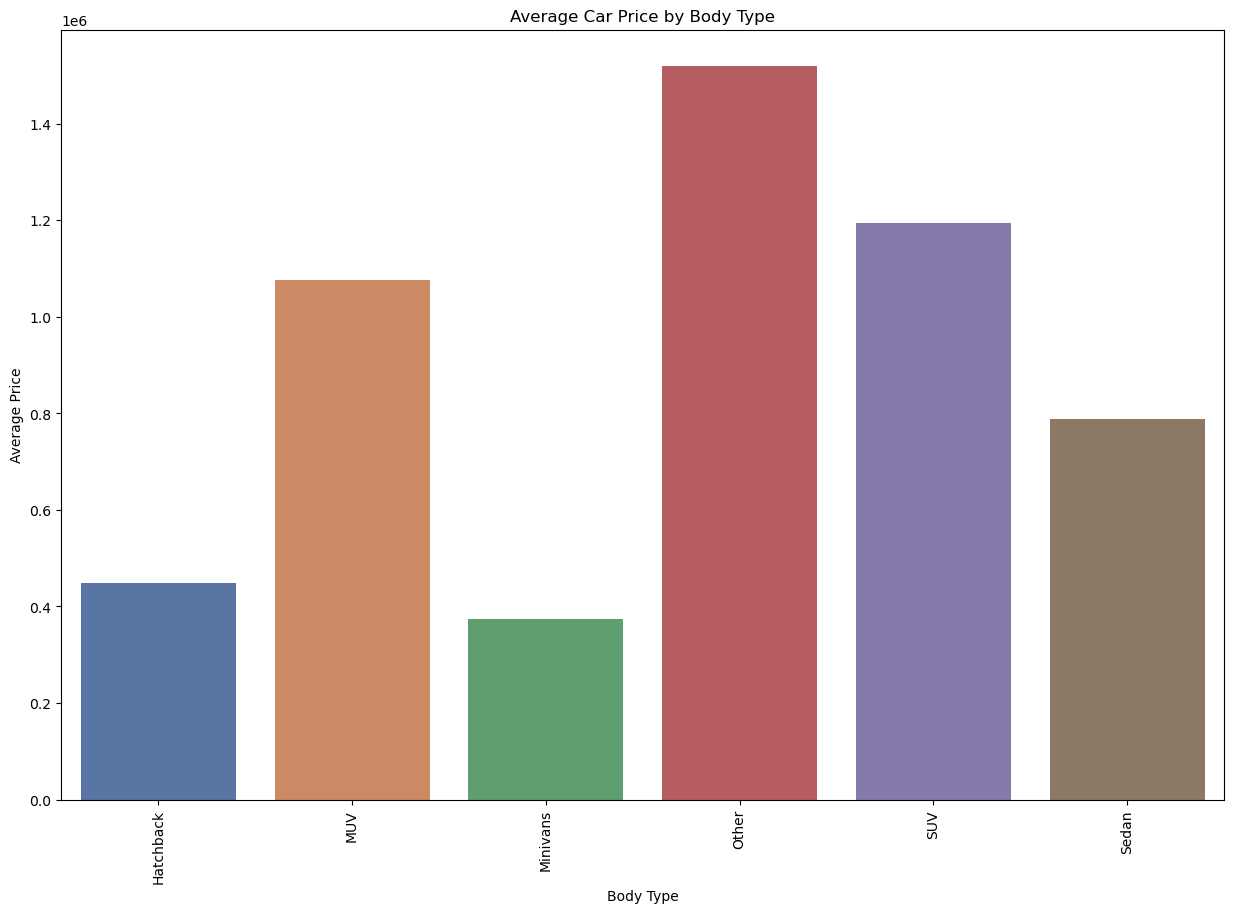

In [69]:
# Calculate average prices 
average_prices = df_outliers_removed.groupby('bt')['price'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x='bt', y='price', data=average_prices, palette='deep')
plt.xticks(rotation=90)
plt.title('Average Car Price by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Average Price')
plt.show()

Transmission

In [71]:
print(df_outliers_removed['transmission'].head())

0    Automatic
1       Manual
2       Manual
3       Manual
4       Manual
Name: transmission, dtype: object


In [72]:
# Ensure you are working with a copy to avoid the SettingWithCopyWarning
df_outliers_removed = df_outliers_removed.copy()

# Drop the duplicate 'transmission' column, keeping the first one
df_outliers_removed = df_outliers_removed.loc[:, ~df_outliers_removed.columns.duplicated()]

# Now, get the value counts for the 'transmission' column
transmission_counts = df_outliers_removed['transmission'].value_counts()

# Print the value counts
print(transmission_counts)

transmission
Manual       5865
Automatic    1908
Name: count, dtype: int64


Oem

In [74]:
df_outliers_removed['oem'].value_counts() <= 5

oem
Maruti                False
Hyundai               False
Honda                 False
Tata                  False
Mahindra              False
Renault               False
Volkswagen            False
Ford                  False
Toyota                False
Skoda                 False
Kia                   False
Audi                  False
Mercedes-Benz         False
Jeep                  False
BMW                   False
MG                    False
Nissan                False
Chevrolet             False
Datsun                False
Fiat                  False
Volvo                 False
Jaguar                False
Land Rover            False
Mitsubishi            False
Mini                  False
Citroen               False
Mahindra Renault       True
Mahindra Ssangyong     True
Isuzu                  True
Hindustan Motors       True
Name: count, dtype: bool

In [75]:
# Calculate the count of each brand
oem_counts = df_outliers_removed['oem'].value_counts()

# Filter rows where the brand count is greater than 5
df_filtered = df_outliers_removed[df_outliers_removed['oem'].map(oem_counts) > 5]

# Print the counts of the remaining brands
print(df_filtered['oem'].value_counts())

oem
Maruti           2169
Hyundai          1627
Honda             852
Tata              424
Mahindra          367
Renault           309
Volkswagen        286
Ford              281
Toyota            269
Skoda             156
Kia               155
Audi              121
Mercedes-Benz     120
Jeep              106
BMW                97
MG                 83
Nissan             78
Chevrolet          76
Datsun             74
Fiat               30
Volvo              20
Jaguar             19
Land Rover         14
Mitsubishi         10
Mini                9
Citroen             8
Name: count, dtype: int64


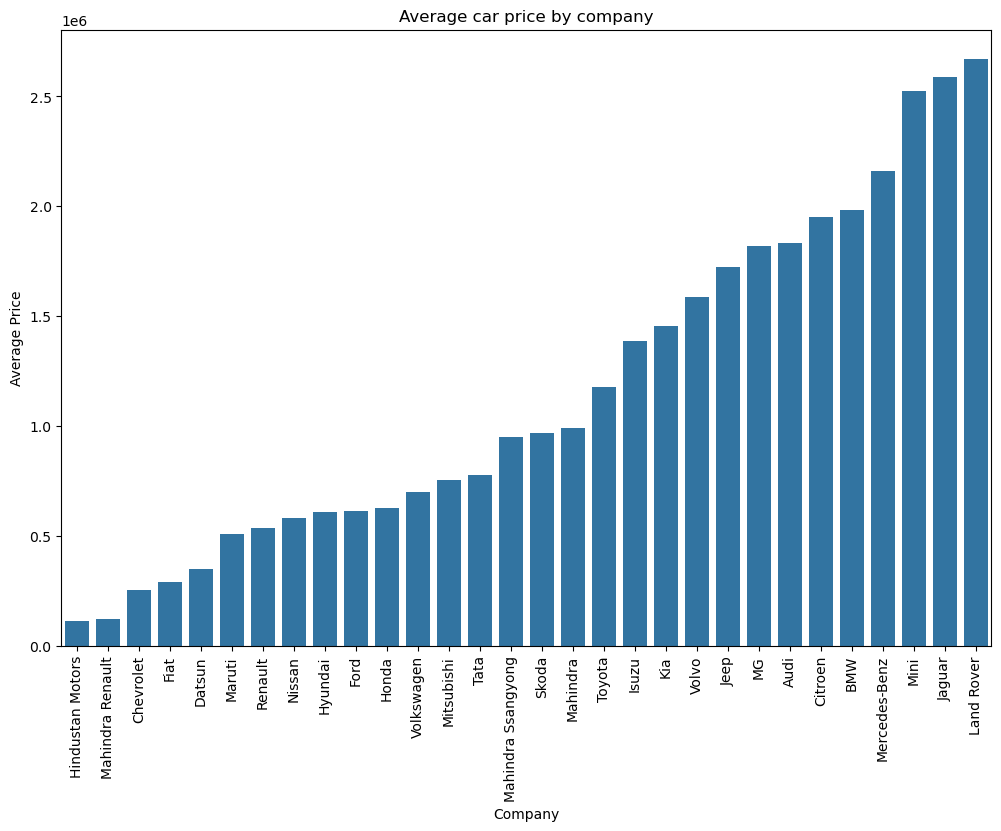

In [76]:
# Rename the column
df_outliers_removed.rename(columns={'oem': 'company'}, inplace=True)

# Calculate and sort average prices
df_avg_prices = df_outliers_removed.groupby('company')['price'].mean().reset_index()
df_avg_prices = df_avg_prices.sort_values(by='price')

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='company', y='price', data=df_avg_prices)
plt.xticks(rotation=90)
plt.title('Average car price by company')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.show()

MODEL

In [78]:
df_outliers_removed['model'].value_counts() <= 10

model
Honda City                  False
Maruti Swift                False
Hyundai i20                 False
Maruti Baleno               False
Hyundai Grand i10           False
                            ...  
Maruti Zen                   True
Volkswagen CrossPolo         True
Land Rover Discovery         True
Mercedes-Benz CLS-Class      True
Toyota Fortuner Legender     True
Name: count, Length: 260, dtype: bool

In [79]:
# Assuming df_outliers_removed is your DataFrame
value_counts = df_outliers_removed['model'].value_counts().reset_index()
value_counts.columns = ['model', 'count']

# Filter using query
filtered_value_counts_df = value_counts.query('count < 10')
print(filtered_value_counts_df)

                        model  count
127        Tata Safari Storme      9
128                 Volvo S60      9
129           BMW 3 Series GT      9
130                Maruti SX4      9
131                Honda BR-V      9
..                        ...    ...
255                Maruti Zen      1
256      Volkswagen CrossPolo      1
257      Land Rover Discovery      1
258   Mercedes-Benz CLS-Class      1
259  Toyota Fortuner Legender      1

[133 rows x 2 columns]


In [80]:
filtered_value_counts_df['count'].sum()

466

In [81]:
# Define the threshold
threshold = 10

# Create a DataFrame of model counts
model_counts = df_outliers_removed['model'].value_counts().reset_index()
model_counts.columns = ['model', 'count']

# Filter using query
filtered_models = model_counts.query('count >= @threshold')['model']

# Filter the original DataFrame
df_filtered = df_outliers_removed[df_outliers_removed['model'].isin(filtered_models)]

# Display the shape of the filtered DataFrame
print(df_filtered.shape)

(7307, 33)


In [82]:
df_outliers_removed['model'].value_counts()

model
Honda City                  363
Maruti Swift                348
Hyundai i20                 328
Maruti Baleno               292
Hyundai Grand i10           259
                           ... 
Maruti Zen                    1
Volkswagen CrossPolo          1
Land Rover Discovery          1
Mercedes-Benz CLS-Class       1
Toyota Fortuner Legender      1
Name: count, Length: 260, dtype: int64

VARIANT NAME

In [84]:
# there are more than 250 models and many classes in Variant name,so we drop these.
df_outliers_removed.drop('variantName',axis=1,inplace=True)

INSURANCE VALIDITY

In [86]:
df_outliers_removed['Insurance Validity'].value_counts()

Insurance Validity
Third Party insurance    3779
Comprehensive            2849
Third Party               622
Zero Dep                  298
Not Available             217
1                           3
2                           1
Name: count, dtype: int64

In [87]:
# Drop rows with null values in 'Insurance Validity'
df_outliers_removed.dropna(subset=['Insurance Validity'], inplace=True)
print(df_outliers_removed['Insurance Validity'].isna().sum())

0


In [88]:
# Replace specific values in 'Insurance Validity'
df_outliers_removed['Insurance Validity'].replace({'1': 'Not Available', '2': 'Not Available', 'Third Party': 'Third Party insurance'}, inplace=True)

C:\Users\anand\AppData\Local\Temp\ipykernel_19784\2520027725.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_outliers_removed['Insurance Validity'].replace({'1': 'Not Available', '2': 'Not Available', 'Third Party': 'Third Party insurance'}, inplace=True)


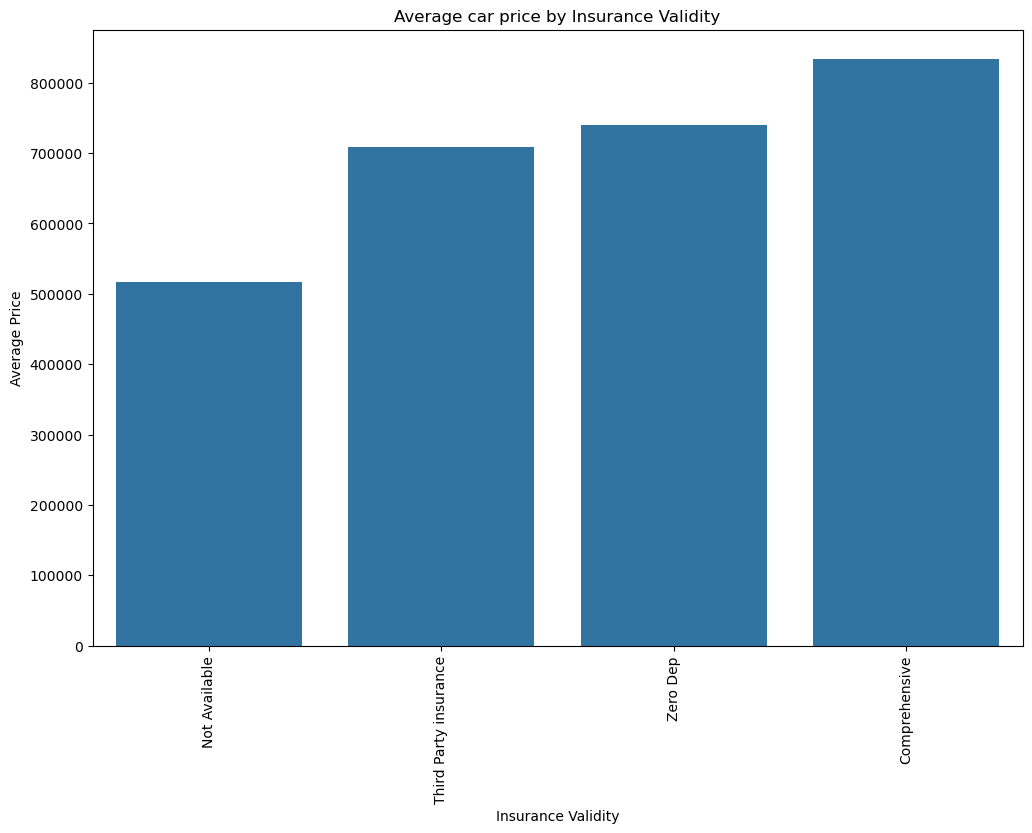

In [89]:
# Plotting average car price by Insurance Validity using Seaborn
plt.figure(figsize=(12, 8))
df_avg_prices = df_outliers_removed.groupby('Insurance Validity')['price'].mean().reset_index()
df_avg_prices = df_avg_prices.sort_values(by='price')

sns.barplot(x='Insurance Validity', y='price', data=df_avg_prices)
plt.xticks(rotation=90)
plt.title('Average car price by Insurance Validity')
plt.xlabel('Insurance Validity')
plt.ylabel('Average Price')
plt.show()

RTO

In [91]:
df_outliers_removed['RTO']

0       TN02
1       TN04
2       TN22
3       TN11
4       KA03
        ... 
8364     NaN
8365     NaN
8366    WB06
8367     NaN
8368     NaN
Name: RTO, Length: 7769, dtype: object

In [92]:
# To Drop a Null Values
df_cleaned_rto = df_outliers_removed['RTO'].dropna()
print(df_cleaned_rto)

0       TN02
1       TN04
2       TN22
3       TN11
4       KA03
        ... 
8348    WB02
8349    WB24
8356    WB20
8359    PB10
8366    WB06
Name: RTO, Length: 6951, dtype: object


In [93]:
# Count of NaN values
nan_count = df_outliers_removed['RTO'].isna().sum()

# Count of unique values
unique_rtos = df_outliers_removed['RTO'].nunique()

print(f"Number of NaN values: {nan_count}")
print(f"Number of unique RTO values: {unique_rtos}")

Number of NaN values: 818
Number of unique RTO values: 442


In [94]:
print(df_outliers_removed['RTO'].value_counts())
print(df_outliers_removed['RTO'].isna().sum())

RTO
WB02    432
RJ14    350
TS07    272
TS08    235
KA03    226
       ... 
Hr22      1
DD4L      1
UP37      1
HR89      1
WB72      1
Name: count, Length: 442, dtype: int64
818


In [95]:
# Mapping dictionary for RTO regions
rto_region_mapping = {
    'KA': 'Karnataka',
    'HR': 'Haryana',
    'WB': 'West Bengal',
    'TN': 'Tamil Nadu',
    'UP': 'Uttar Pradesh',
    'DL': 'Delhi',
    'MH': 'Maharashtra',
    'RJ': 'Rajasthan',
    'AP': 'Andhra Pradesh',
    'GJ': 'Gujarat',
    'OR': 'Odisha',
    'PY': 'Puducherry',
    'Unknown': 'Unknown'
}

# Function to map RTO codes to states
def rto_to_region(rto_value):
    if pd.isna(rto_value):
        return 'Unknown'
    rto_value_str = str(rto_value)  # Ensure value is string
    for prefix in rto_region_mapping:
        if rto_value_str.startswith(prefix):
            return rto_region_mapping[prefix]
    return 'Unknown'

# Handle missing RTO values by setting them to 'Unknown'
df_outliers_removed['RTO'] = df_outliers_removed['RTO'].fillna('Unknown')

# Apply the RTO mapping function and create a new column for regions
df_outliers_removed['RTO_region'] = df_outliers_removed['RTO'].apply(rto_to_region)

# Drop the original 'RTO' column
df_outliers_removed.drop('RTO', axis=1, inplace=True)

# Display the modified DataFrame
df_outliers_removed.head(1)
print(df_outliers_removed['RTO_region'].isna().sum())

0


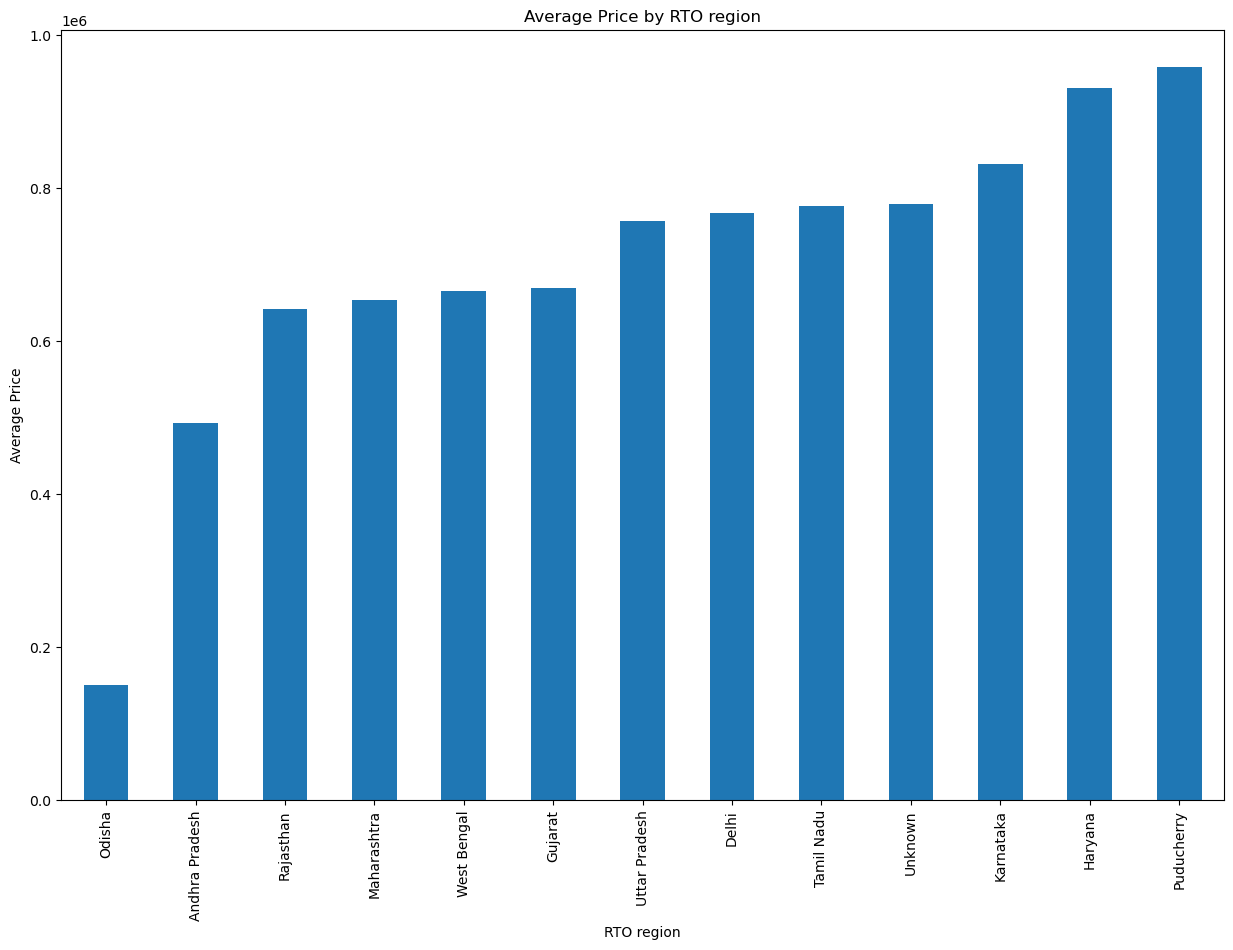

In [96]:
# plotting
plt.figure(figsize=(15, 10))
average_prices = df_outliers_removed.groupby('RTO_region')['price'].mean().sort_values()
average_prices.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Average Price by RTO region')
plt.xlabel('RTO region')
plt.ylabel('Average Price')
plt.show()

COLOR

In [98]:
df_outliers_removed['Color']

0        ['Black']
1         ['Grey']
2       ['Others']
3       ['Silver']
4       ['Others']
           ...    
8364    ['Others']
8365    ['Others']
8366    ['Others']
8367    ['Others']
8368    ['Others']
Name: Color, Length: 7769, dtype: object

In [99]:
print(df_outliers_removed['Color'].value_counts())
print(df_outliers_removed['Color'].isna().sum())

Color
['Others']             2039
['White']              1477
['Silver']             1221
['Red']                 778
['Blue']                548
                       ... 
['beige']                 1
['g brown']               1
['urban titanim']         1
['b red']                 1
['Out Back Bronze']       1
Name: count, Length: 150, dtype: int64
0


In [100]:
def determine_color(Color):
    color_lower = Color.lower()

    if 'white' in color_lower:
        return 'White'
    elif 'red' in color_lower or 'wine' in color_lower or 'cherry' in color_lower:
        return 'Red'
    elif 'blue' in color_lower:
        return 'Blue'
    elif 'brown' in color_lower:
        return 'Brown'
    elif 'gold' in color_lower:
        return 'Gold'
    elif 'green' in color_lower:
        return 'Green'
    elif 'black' in color_lower:
        return 'Black'
    elif 'orange' in color_lower:
        return 'Orange'
    elif 'yellow' in color_lower:
        return 'Yellow'
    elif 'bronze' in color_lower:
        return 'Bronze'
    elif 'purple' in color_lower:
        return 'Purple'
    elif 'gray' in color_lower:
        return 'Gray'
    elif 'silver' in color_lower or 'metal' in color_lower or 'steel' in color_lower:
        return 'Silver'
    else:
        return 'Other'

In [101]:
# Apply the function to the DataFrame column
df_outliers_removed['Color'] = df_outliers_removed['Color'].apply(determine_color)
df_outliers_removed['Color'].value_counts()

Color
Other     2638
White     1527
Silver    1264
Red        800
Blue       560
Black      363
Brown      277
Gray       108
Orange      99
Gold        57
Green       42
Yellow      19
Purple      10
Bronze       5
Name: count, dtype: int64

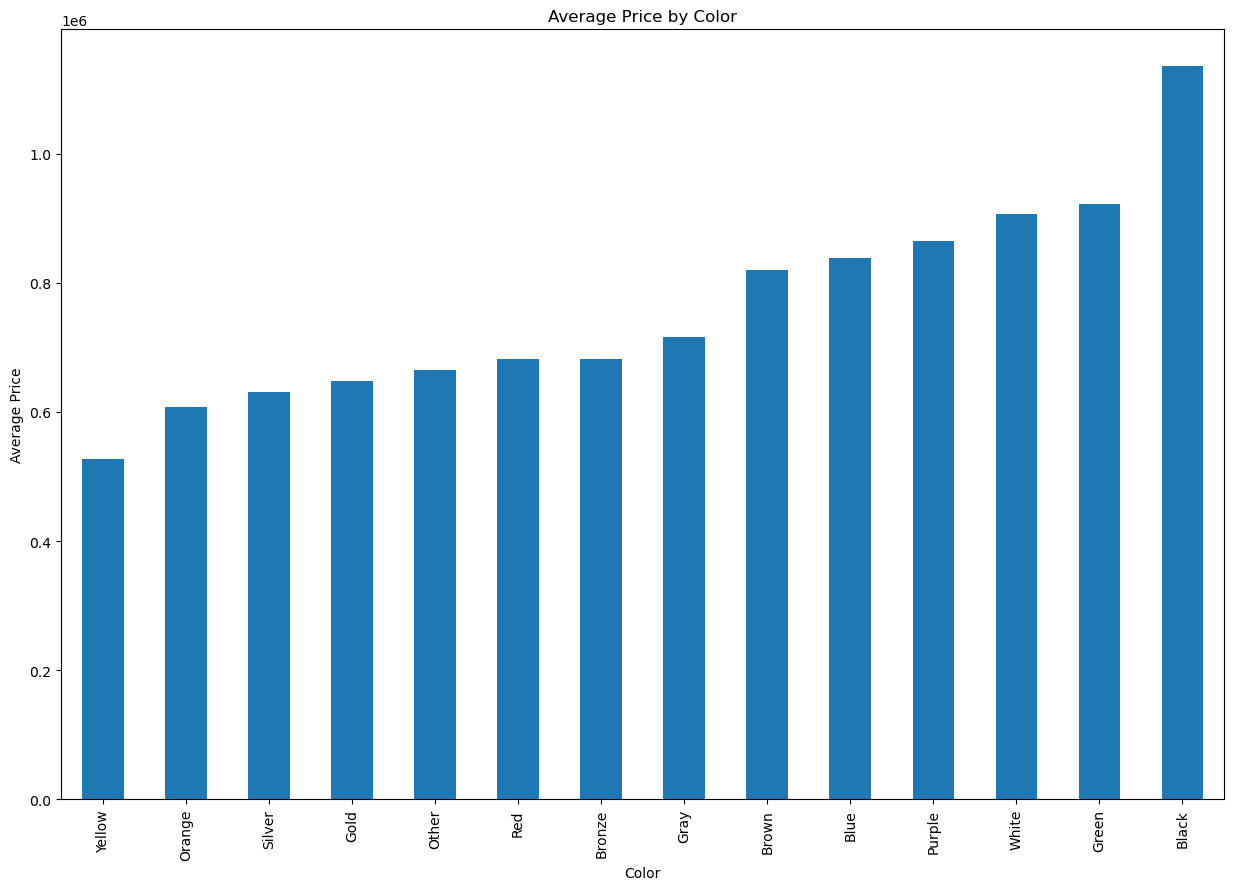

In [102]:
#plotting
plt.figure(figsize=(15, 10))
average_prices = df_outliers_removed.groupby('Color')['price'].mean().sort_values()
average_prices.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Average Price by Color')
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.show()

ENGINE TYPE

In [104]:
df_outliers_removed['Engine Type']

0       ['Smartstream G1.0 T - GDi']
1                 ['In-Line Engine']
2          ['HRA0 1.0 TURBO PETROL']
3                   ['IRDE2 Engine']
4           ['i-VTEC Petrol Engine']
                    ...             
8364                        ['K10C']
8365           ['F8D Petrol Engine']
8366      ['Blue Efficiency Engine']
8367      ['K Series Petrol Engine']
8368       ['dCi THP Diesel Engine']
Name: Engine Type, Length: 7769, dtype: object

In [105]:
df_outliers_removed['Engine Type'].value_counts()

Engine Type
['In-Line Engine']                    434
['Kappa VTVT Petrol Engine']          424
['Petrol Engine']                     307
['i-VTEC Petrol Engine']              265
['i VTEC Engine']                     199
                                     ... 
['Dicor Diesel Engine']                 1
['water cooled inline 4 cylinder']      1
['All Aluminium light weigh']           1
['In Line TwinTurbo Engine']            1
['2AR-FE Petrol Engine']                1
Name: count, Length: 427, dtype: int64

In [106]:
# Drop the 'Engine Type' column in place
df_outliers_removed.drop(columns=['Engine Type'], inplace=True)

In [107]:
df_outliers_removed.columns

Index(['ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'company',
       'model', 'modelYear', 'price', 'Insurance Validity', 'Fuel Type',
       'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'Torque', 'Color', 'Displacement',
       'Fuel Suppy System', 'Turbo Charger', 'Gear Box', 'Drive Type',
       'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type',
       'Mileage', 'Super Charger', 'city', 'RTO_region'],
      dtype='object')

FUEL SUPPLY SYSTEM

In [109]:
df_outliers_removed['Fuel Suppy System']

0            ['GDi']
1           ['MPFi']
2           ['MPFi']
3           ['MPFI']
4       ['PGM - Fi']
            ...     
8364             NaN
8365        ['MPFi']
8366        ['Mpfi']
8367        ['MPFI']
8368        ['CRDi']
Name: Fuel Suppy System, Length: 7769, dtype: object

In [110]:
# Standardize the values to lowercase to count consistently
df_outliers_removed['Fuel Suppy System'] = df_outliers_removed['Fuel Suppy System'].str.lower()

# Get the value counts after standardizing
fuel_supply_counts = df_outliers_removed['Fuel Suppy System'].value_counts()

# Print the full counts
print(fuel_supply_counts)

Fuel Suppy System
['mpfi']                                  2822
['crdi']                                  1535
['direct injection']                       662
['pgm-fi']                                 212
['pgm - fi']                               155
['gdi']                                    117
['mpi']                                     85
['common rail']                             76
['efi(electronic fuel injection)']          61
['efi']                                     61
['tsi']                                     58
['sefi']                                    38
['pgm-fi (programmed fuel injection)']      37
['mpfi ']                                   34
['direct injection ']                       29
['efi (electronic fuel injection)']         27
['electronic injection system']             15
['electronic fuel injection']               13
['tdci']                                    11
['multi-point injection']                   11
['cdi']                                   

In [111]:
df_outliers_removed.drop(['Fuel Suppy System'],axis=1,inplace=True)

TURBO CHARGER AND SUPER CHARGER

In [113]:
print(df_outliers_removed['Turbo Charger'].value_counts())
print(df_outliers_removed['Turbo Charger'].isna().sum())
print('\n',df_outliers_removed['Super Charger'].value_counts())
print(df_outliers_removed['Super Charger'].isna().sum())

Turbo Charger
['No']       4094
['Yes']      2655
['NO']         20
['YES']        15
['Twin']       10
['no']          9
['Turbo']       1
['yes']         1
Name: count, dtype: int64
964

 Super Charger
['No']     5962
['Yes']       9
['NO']        2
['yes']       1
['no']        1
Name: count, dtype: int64
1794


In [114]:
# in super charger more than 90% values are No and there are many null values so we drop it and use Turbo charger column instead
df_outliers_removed.drop('Super Charger',axis=1,inplace=True)

In [115]:
# Mapping dictionary to standardize 'Turbo Charger' values 
# We are Filling the False in Missing Values(NULL)

turbo_mapping = { 
    "['No']": False, 
    "['no']": False, 
    "['NO']": False, 
    "['Yes']": True, 
    "['yes']": True, 
    "['YES']": True, 
    "['Twin']": True,  
    "['Turbo']": True 
} 
# Apply the mapping 
df_outliers_removed['Turbo Charger'] = df_outliers_removed['Turbo Charger'].map(turbo_mapping).fillna(False)

# Print the value counts to verify the transformation
print(df_outliers_removed['Turbo Charger'].value_counts())

# Print the count of missing (NaN) values after applying the mapping
print(df_outliers_removed['Turbo Charger'].isna().sum())

Turbo Charger
False    5087
True     2682
Name: count, dtype: int64
0


C:\Users\anand\AppData\Local\Temp\ipykernel_19784\297294024.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_outliers_removed['Turbo Charger'] = df_outliers_removed['Turbo Charger'].map(turbo_mapping).fillna(False)


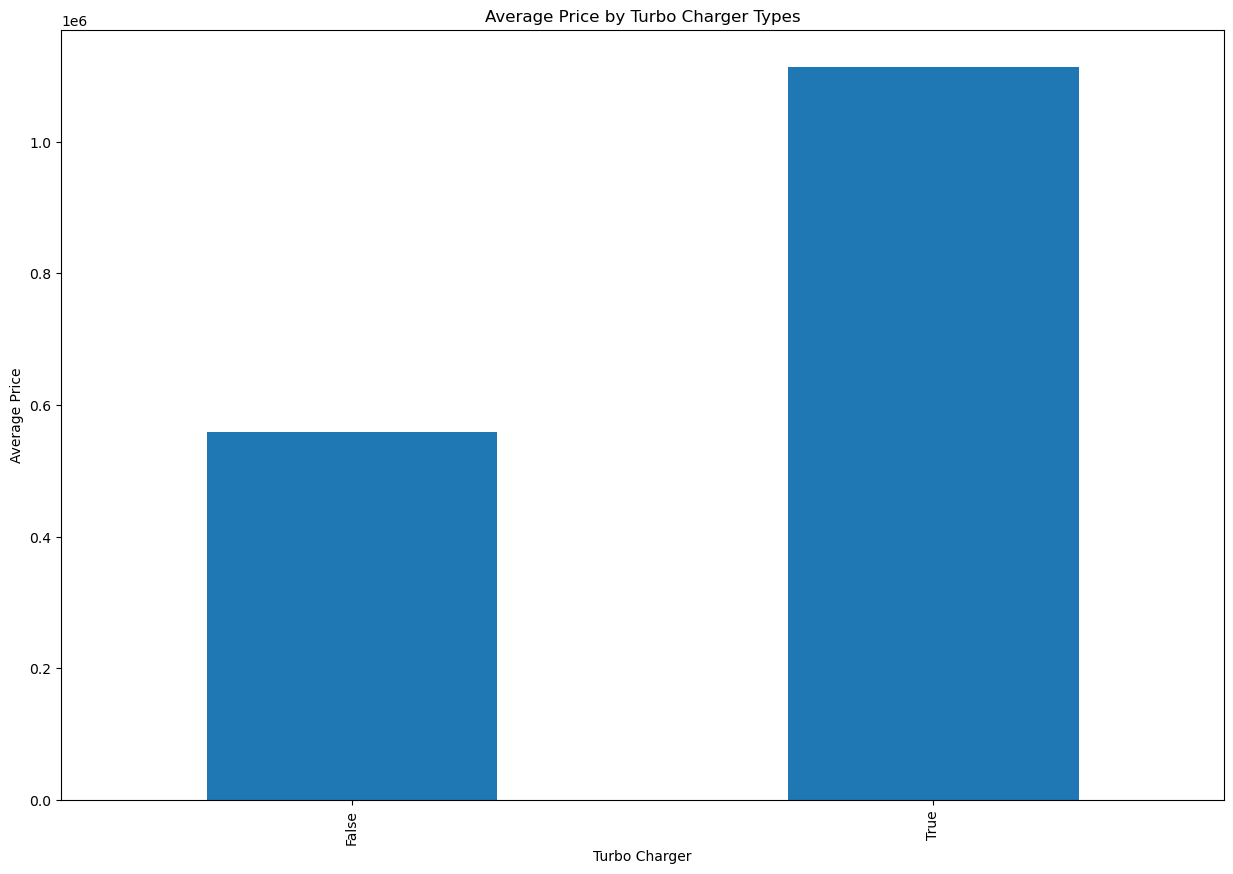

In [116]:
#plotting
plt.figure(figsize=(15, 10))
average_prices = df_outliers_removed.groupby('Turbo Charger')['price'].mean().sort_values()
average_prices.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Average Price by Turbo Charger Types')
plt.xlabel('Turbo Charger')
plt.ylabel('Average Price')
plt.show()

GEAR BOX

In [118]:
df_outliers_removed['Gear Box']

0       ['7-Speed DCT']
1           ['5 Speed']
2           ['5 Speed']
3           ['5 Speed']
4           ['5 Speed']
             ...       
8364        ['5-Speed']
8365        ['5 Speed']
8366        ['7 Speed']
8367        ['5 Speed']
8368        ['6 Speed']
Name: Gear Box, Length: 7769, dtype: object

In [119]:
print(df_outliers_removed['Gear Box'].value_counts())
print(df_outliers_removed['Gear Box'].isna().sum())

Gear Box
['5 Speed']                                     4327
['6 Speed']                                     1017
['5-Speed']                                      531
['6-Speed']                                      230
['7 Speed']                                      223
                                                ... 
['Six Speed Geartronic, Six Speed Automati']       1
['7 speed']                                        1
['6-speed iMT']                                    1
['7-speed']                                        1
['6 Speed with Sequential Shift']                  1
Name: count, Length: 89, dtype: int64
77


In [120]:
# The 'Gear Box' column has numerous unique values so good idea to drop it
# Dropping the 'Gear Box' column 
df_outliers_removed.drop('Gear Box', axis=1, inplace=True)

DRIVE TYPE

In [122]:
df_outliers_removed['Drive Type']

0       ['FWD']
1       ['RWD']
2           NaN
3       ['FWD']
4       ['FWD']
         ...   
8364        NaN
8365    ['FWD']
8366    ['RWD']
8367    ['FWD']
8368    ['AWD']
Name: Drive Type, Length: 7769, dtype: object

In [123]:
print(df_outliers_removed['Drive Type'].value_counts())
print(df_outliers_removed['Drive Type'].isna().sum())

Drive Type
['FWD']                                  5348
['RWD']                                   317
['2WD']                                   148
['AWD']                                   137
['4X2']                                    68
['4WD']                                    63
['2 WD']                                   46
['4X4']                                    41
['Front Wheel Drive']                      40
['FWD ']                                   34
['4x2']                                    15
['Two Wheel Drive']                        15
['All Wheel Drive']                         7
['4x4']                                     7
['Rear Wheel Drive with ESP']               6
['RWD(with MTT)']                           5
['Permanent all-wheel drive quattro']       2
['4 WD']                                    1
['2WD ']                                    1
Name: count, dtype: int64
1468


In [124]:
# Define a function to classify Drive Type into three categories
def classify_drive_type(drive):
    if isinstance(drive, str):  # Check if 'drive' is a string
        drive = drive.lower()  # Convert to lowercase for consistency
        if 'fwd' in drive or 'front' in drive or 'two wheel' in drive or '2wd' in drive:
            return '2WD'
        elif 'awd' in drive or '4wd' in drive or '4x4' in drive or 'rwd' in drive or 'rear' in drive:
            return 'AWD/4WD'
    # Handle missing or unclassified values by returning 'Unknown'
    return 'Unknown'

# Apply the classification function to the 'Drive Type' column
df_outliers_removed['Drive_Type_Classified'] = df_outliers_removed['Drive Type'].apply(classify_drive_type)

# Verify the result
print(df_outliers_removed['Drive_Type_Classified'].value_counts())

Drive_Type_Classified
2WD        5586
Unknown    1607
AWD/4WD     576
Name: count, dtype: int64


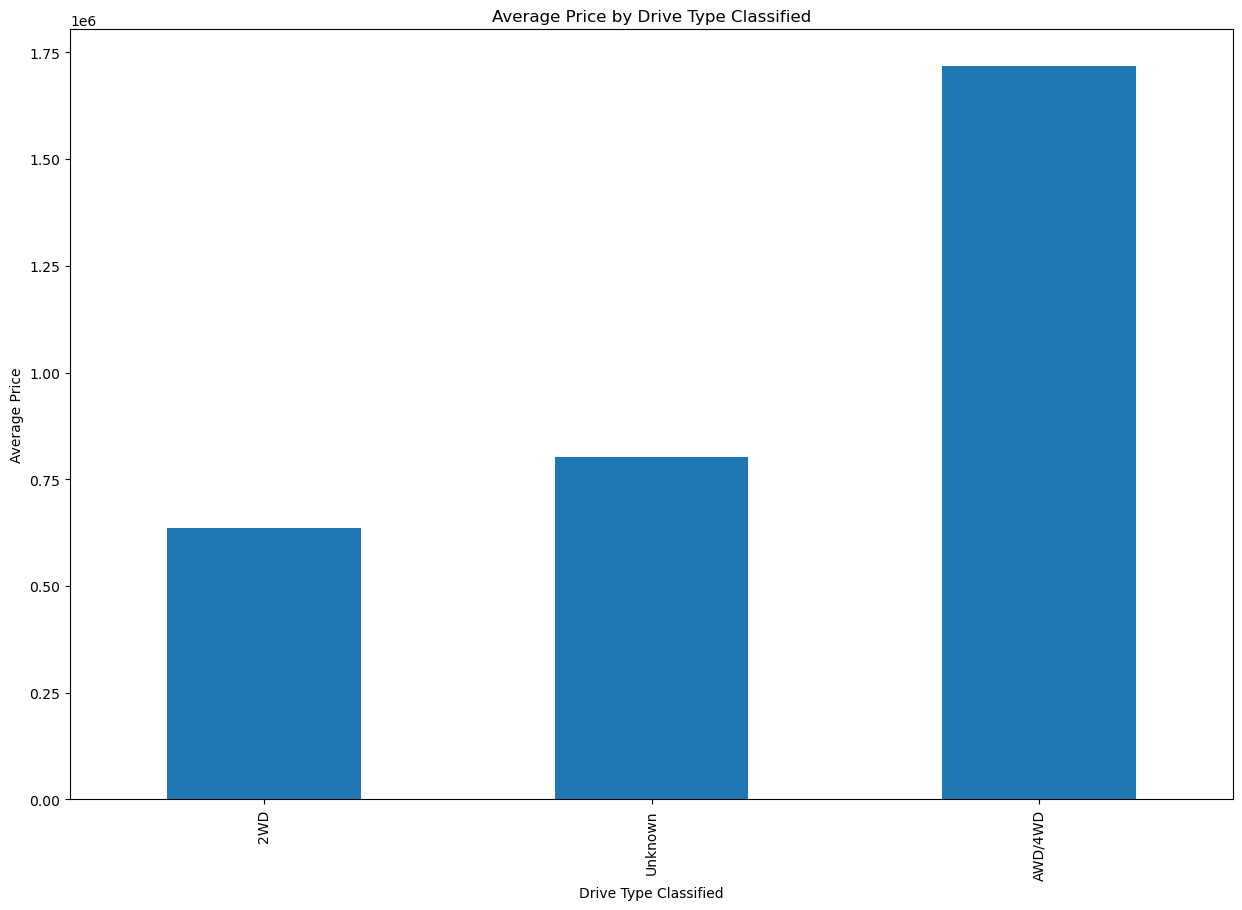

In [125]:
#plotting
plt.figure(figsize=(15, 10))
average_prices = df_outliers_removed.groupby('Drive_Type_Classified')['price'].mean().sort_values()
average_prices.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Average Price by Drive Type Classified')
plt.xlabel('Drive Type Classified')
plt.ylabel('Average Price')
plt.show()

In [126]:
# drop the old column
df_outliers_removed.drop(['Drive Type'],axis=1,inplace=True)

STEERING TYPE

In [128]:
df_outliers_removed['Steering Type']

0         ['Electric']
1           ['Manual']
2       ['Electronic']
3            ['Power']
4            ['Power']
             ...      
8364      ['Electric']
8365         ['Power']
8366         ['Power']
8367         ['Power']
8368         ['Power']
Name: Steering Type, Length: 7769, dtype: object

In [129]:
print(df_outliers_removed['Steering Type'].value_counts())
print(df_outliers_removed['Steering Type'].isna().sum())

Steering Type
['Power']         5925
['Electric']      1369
['Electronic']     102
['Manual']          66
['Electrical']      39
['power']           29
['EPAS']             9
['Hydraulic']        2
['electric']         1
Name: count, dtype: int64
227


In [130]:
# Define a function to classify Steering Type into three categories
def classify_steering_type(steering):
    if isinstance(steering, str):
        steering = steering.lower()  # Convert to lowercase for consistency
        if 'power' in steering or 'hydraulic' in steering:
            return 'Power'
        elif 'electric' in steering or 'electronic' in steering or 'epas' in steering:
            return 'Electric'
        elif 'manual' in steering:
            return 'Manual'

    # Handle missing or unclassified values by returning 'Power'
    return 'Power'

# Apply the classification function to the 'Steering Type' column
df_outliers_removed['Steering_Type_Classified'] = df_outliers_removed['Steering Type'].apply(classify_steering_type)

# Verify the result
print(df_outliers_removed['Steering_Type_Classified'].value_counts())

Steering_Type_Classified
Power       6183
Electric    1520
Manual        66
Name: count, dtype: int64


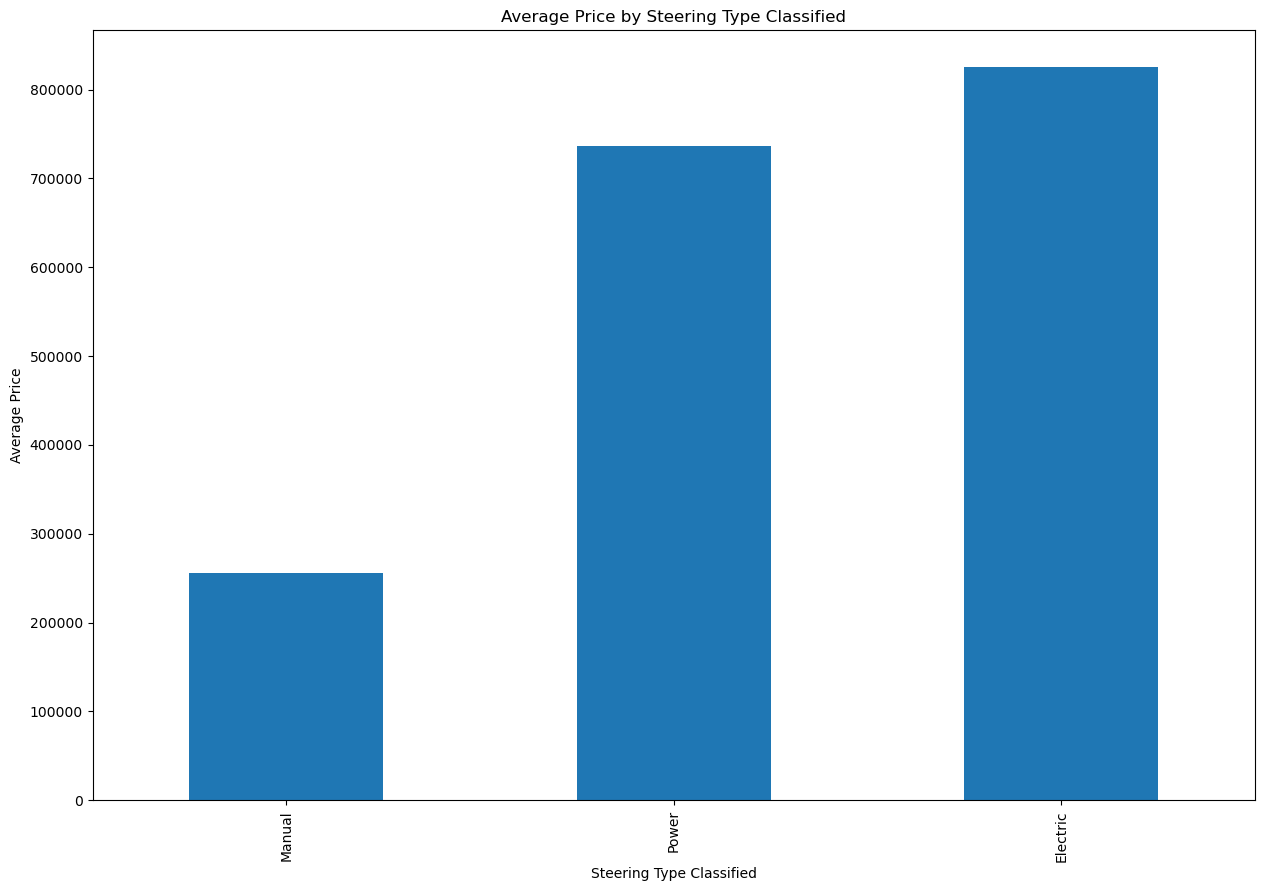

In [131]:
#plotting
plt.figure(figsize=(15, 10))
average_prices = df_outliers_removed.groupby('Steering_Type_Classified')['price'].mean().sort_values()
average_prices.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Average Price by Steering Type Classified')
plt.xlabel('Steering Type Classified')
plt.ylabel('Average Price')
plt.show()

In [132]:
# Dropping the 'Steering_Type_Classified' and 'Steering Type' columns 
df_outliers_removed.drop(['Steering_Type_Classified', 'Steering Type'], axis=1, inplace=True)

FRONT BRAKE TYPE AND REAR BRAKE TYPE

In [134]:
print(df_outliers_removed['Front Brake Type'].value_counts())
print('\n', df_outliers_removed['Rear Brake Type'].value_counts())

Front Brake Type
['Disc']                                        5038
['Ventilated Disc']                             2322
['Disc ']                                         72
['Solid Disc']                                    63
['Ventilated Discs']                              55
['Disc & Caliper Type']                           40
['Disk']                                          23
['Ventilated Disc ']                              23
['Ventilated Disk']                               11
['disc']                                           7
['Vantilated Disc']                                7
[' Disc']                                          6
['Ventilated discs']                               6
['Ventlated Disc']                                 6
['Drum']                                           6
['Multilateral Disc']                              6
['Ventilated DIsc']                                5
['Ventillated Disc']                               3
['Booster assisted ventilated

In [135]:
# Dropping the 'Front Brake Type' and 'Rear Brake Type' columns 
df_outliers_removed.drop(['Front Brake Type', 'Rear Brake Type'], axis=1, inplace=True)

TYRE TYPE

In [137]:
print(df_outliers_removed['Tyre Type'].value_counts())

Tyre Type
['Tubeless,Radial']           4053
['Tubeless, Radial']          1354
['Tubeless']                  1147
['Tubeless Tyres']             403
['Radial, Tubeless']           225
['Radial']                     121
['Radial, Tubless']             82
['Tubeless Tyres, Radial']      54
['Tubeless,Radial ']            54
['Tubeless Radial Tyres']       51
['Radial,Tubeless']             42
['Tubeless,Radials']            33
['Tubless, Radial']             28
['tubeless tyre']               14
['Runflat']                     11
['Run-Flat']                     9
['Tubeless ']                    7
['Radial Tubeless']              5
['Tubeless, Runflat']            4
['Tubeless Radials Tyre']        3
['Tubeless Radial']              2
['Radial with tube']             2
['Runflat Tyres']                2
['Tubeless Tyre']                2
['Radial ']                      1
['Tubeless,Runflat']             1
['Tubless,Radial']               1
['Radial Tyres']                 1
['Tubeless

In [138]:
# Dropping the 'Tyre Type' columns 
df_outliers_removed.drop(['Tyre Type'], axis=1, inplace=True)

CITY

In [140]:
print(df_outliers_removed['city'].value_counts())

city
Hyderabad    1411
Bangalore    1380
Chennai      1324
Kolkata      1299
Delhi        1293
Jaipur       1062
Name: count, dtype: int64


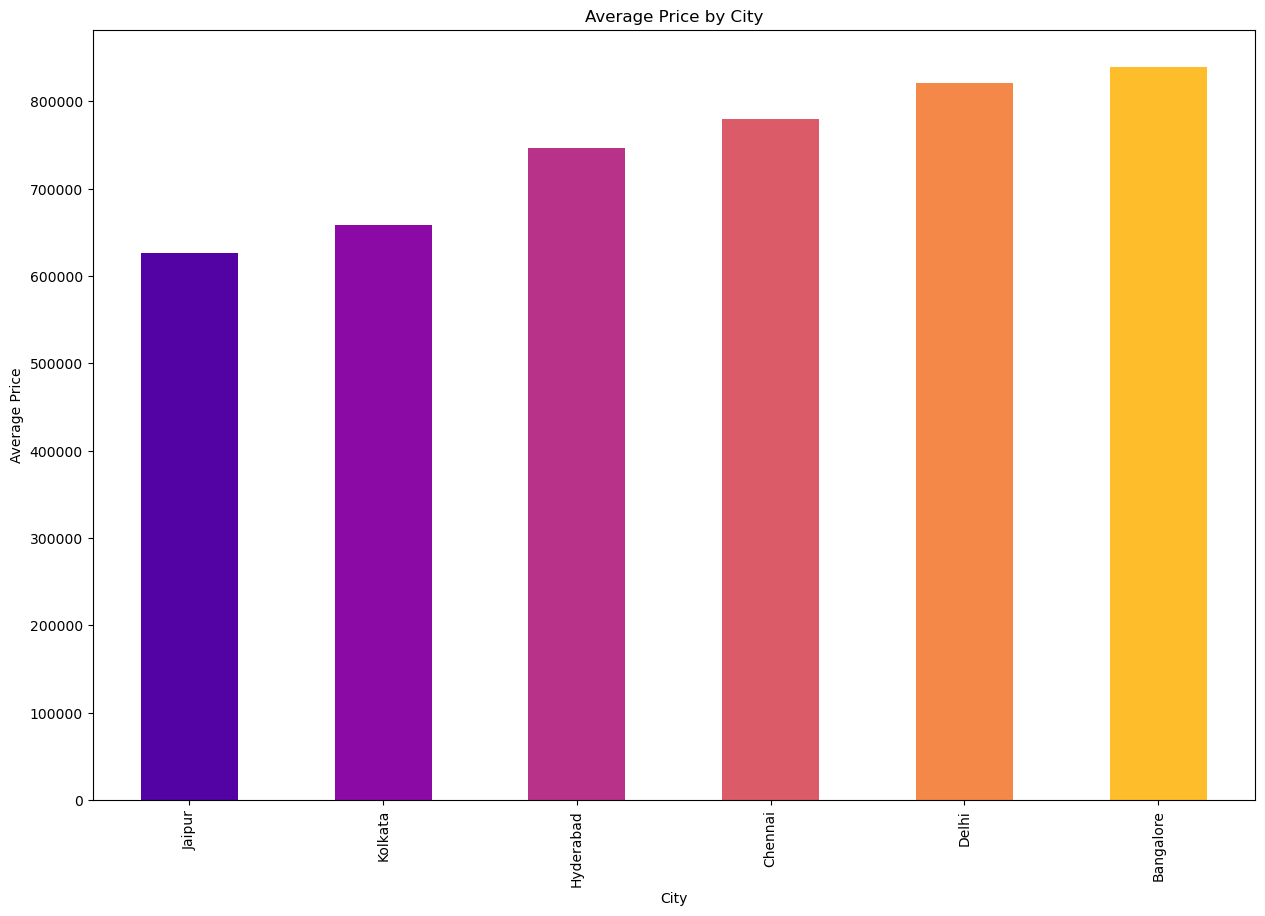

In [141]:
#plotting
plt.figure(figsize=(15, 10))
average_prices = df_outliers_removed.groupby('city')['price'].mean().sort_values()
palette = sns.color_palette("plasma", n_colors=len(average_prices))  # Change "coolwarm" to any palette name
average_prices.plot(kind='bar', color=palette)  # Applying the color palette
plt.xticks(rotation=90)
plt.title('Average Price by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.show()

In [142]:
# Dropping the 'owner', 'Fuel Type', 'Ownership', 'Engine Displacement', 'Transmission', 'Year of Manufacture', 'Torque' columns 
df_outliers_removed.drop(['owner', 'Fuel Type', 'Ownership', 'Engine Displacement', 'Transmission', 'Year of Manufacture', 'Torque'], axis=1, inplace=True)

In [143]:
df_outliers_removed.isna().sum()

ft                       0
bt                       0
km                       0
transmission             0
ownerNo                  0
company                  0
model                    0
modelYear                0
price                    0
Insurance Validity       0
Color                    0
Displacement             0
Turbo Charger            0
Mileage                  0
city                     0
RTO_region               0
Drive_Type_Classified    0
dtype: int64

In [144]:
df_outliers_removed.to_excel('Preprocessed_data.xlsx',index=False)

In [145]:
df_outliers_removed.head()

,ft,bt,km,transmission,ownerNo,company,model,modelYear,price,Insurance Validity,Color,Displacement,Turbo Charger,Mileage,city,RTO_region,Drive_Type_Classified
0,Petrol,SUV,20000.0,Automatic,1,Kia,Kia Sonet,2022,1150000.0,Third Party insurance,Black,998.0,True,19.23,Chennai,Tamil Nadu,2WD
1,Petrol,Minivans,20687.0,Manual,1,Maruti,Maruti Eeco,2015,415000.0,Comprehensive,Other,1196.0,False,15.37,Chennai,Tamil Nadu,AWD/4WD
2,Petrol,SUV,30000.0,Manual,1,Nissan,Nissan Magnite,2021,750000.0,Third Party insurance,Other,999.0,True,20.00,Chennai,Tamil Nadu,Unknown
3,Petrol,Hatchback,59247.0,Manual,1,Hyundai,Hyundai i10,2015,398000.0,Comprehensive,Silver,1086.0,False,19.81,Chennai,Tamil Nadu,2WD
4,Petrol,Hatchback,50000.0,Manual,1,Honda,Honda Jazz,2015,550000.0,Third Party insurance,Other,1199.0,False,18.70,Chennai,Karnataka,2WD


PREPARING MODELS

Linear Regression, Decision Trees, Random Forests, Gradient Boosting Machines.

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor # Ensure you have xgboost installed
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [149]:
# Load the dataset 
df_cars = pd.read_excel('Preprocessed_data.xlsx') 

# Identify categorical and numerical columns 
cat_features = df_cars.select_dtypes(include=['object']).columns 
num_features = df_cars.select_dtypes(include=['number']).columns 

# Separate features (X) and target (y) 
X = df_cars.drop('price', axis=1) 
y = df_cars['price'] 

# Encode categorical features 
X_encoded = pd.get_dummies(X, columns=cat_features, drop_first=True) 

# Split into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, shuffle=True) 
print(f"Training data shape: {X_train.shape}") 
print(f"Testing data shape: {X_test.shape}")

Training data shape: (6215, 339)
Testing data shape: (1554, 339)


In [150]:
# Model Development
# Define models
regressors = {
    'Random Forest': RandomForestRegressor(),
    'XGBoost Regressor': XGBRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Linear Regression': LinearRegression()
}

# Store model performance results
performance_results = {}

# Loop through each model
for model_name, model in regressors.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    # Compute performance metrics for training and testing sets
    metrics = {
        'Train MSE': mean_squared_error(y_train, train_preds),
        'Train MAE': mean_absolute_error(y_train, train_preds),
        'Train R2': r2_score(y_train, train_preds),
        'Train MAPE': mean_absolute_percentage_error(y_train, train_preds) * 100,
        'Test MSE': mean_squared_error(y_test, test_preds),
        'Test MAE': mean_absolute_error(y_test, test_preds),
        'Test R2': r2_score(y_test, test_preds),
        'Test MAPE': mean_absolute_percentage_error(y_test, test_preds) * 100
    }
    
    performance_results[model_name] = metrics

# Convert results to DataFrame
results_df = pd.DataFrame(performance_results).T

# Display results
print(results_df)

                            Train MSE      Train MAE  Train R2  Train MAPE  \
Random Forest            3.841252e+09   33576.133567  0.988791    5.346963   
XGBoost Regressor        7.184288e+09   58373.898129  0.979037   10.112668   
Decision Tree Regressor  3.127184e+07     360.793778  0.999909    0.049620   
Linear Regression        3.140051e+10  108588.348025  0.908375   20.611544   

                             Test MSE       Test MAE   Test R2  Test MAPE  
Random Forest            2.628988e+10   93155.430836  0.923414  14.603232  
XGBoost Regressor        2.497535e+10   92859.841525  0.927243  14.009535  
Decision Tree Regressor  4.760648e+10  122504.998713  0.861315  18.380142  
Linear Regression        4.609904e+10  124338.792707  0.865707  22.608574  


In [151]:
# Random Forest Tuning
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Hyperparameter Tuning
rf_random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='neg_mean_absolute_percentage_error',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the RandomizedSearchCV
rf_random_search.fit(X_train, y_train)

# Get the best parameters
best_rf_params = rf_random_search.best_params_
print(f"Best Random Forest Parameters: {best_rf_params}")

# Initialize and train the Random Forest model with best parameters
best_rf_model = RandomForestRegressor(
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf=best_rf_params['min_samples_leaf'],
    max_features=best_rf_params['max_features'],
    bootstrap=best_rf_params['bootstrap'],
    random_state=42
)

# Fit the model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on training data
y_train_pred = best_rf_model.predict(X_train)

# Calculate metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred) * 100

# Print metrics for the training set
print(f"Training Metrics:")
print(f"MSE: {train_mse}")
print(f"MAE: {train_mae}")
print(f"R^2: {train_r2}")
print(f"MAPE: {train_mape}%")

# Make predictions on test data
y_test_pred = best_rf_model.predict(X_test)

# Calculate metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100

# Print metrics for the test set
print(f"\nTest Metrics:")
print(f"MSE: {test_mse}")
print(f"MAE: {test_mae}")
print(f"R^2: {test_r2}")
print(f"MAPE: {test_mape}%")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\anand\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
260 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
147 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anand\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anand\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\anand\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\anand\anaconda3\Lib\site-packag

Best Random Forest Parameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Training Metrics:
MSE: 12624154737.39729
MAE: 69226.19888032248
R^2: 0.9631635201302595
MAPE: 12.69251325103949%

Test Metrics:
MSE: 40039687845.37226
MAE: 114626.12855533675
R^2: 0.883358330177773
MAPE: 20.09383716631879%


In [152]:
# XGBoost : Tuning using RandomizedSearchCV and testing again 
xgb_model = XGBRegressor(random_state=42) 

# Define hyperparameter grid for RandomizedSearchCV 
param_distributions_xgb = { 
    'n_estimators': [100, 200, 300], 
    'max_depth': [3, 5, 10, 15, 20], 
    'learning_rate': [0.01, 0.1, 0.2, 0.3], 
    'subsample': [0.6, 0.8, 1.0], 
    'colsample_bytree': [0.6, 0.8, 1.0] } 

# Perform RandomizedSearchCV 
xgb_random_search = RandomizedSearchCV( 
    estimator=xgb_model, 
    param_distributions=param_distributions_xgb, 
    n_iter=50, 
    scoring='neg_mean_absolute_percentage_error', 
    cv=5, 
    n_jobs=-1, 
    verbose=1, 
    random_state=42 
) 

# Fit the model 
xgb_random_search.fit(X_train, y_train) 

# Get the best parameters 
best_xgb_params = xgb_random_search.best_params_ 
print(f"Best XGBoost Parameters: {best_xgb_params}") 

# Initialize and train the XGBoost model with the best parameters 
best_xgb_model = XGBRegressor( 
    n_estimators=best_xgb_params['n_estimators'], 
    max_depth=best_xgb_params['max_depth'], 
    learning_rate=best_xgb_params['learning_rate'], 
    subsample=best_xgb_params['subsample'], 
    colsample_bytree=best_xgb_params['colsample_bytree'], 
    random_state=42 
) 
best_xgb_model.fit(X_train, y_train) 

# Make predictions on the training set 
y_train_pred_xgb = best_xgb_model.predict(X_train) 

# Calculate metrics for the training set 
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb) 
mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb) 
r2_train_xgb = r2_score(y_train, y_train_pred_xgb) 
mape_train_xgb = mean_absolute_percentage_error(y_train, y_train_pred_xgb) * 100 

# Print metrics for the training set 
print(f"XGBoost Training Metrics:") 
print(f"MSE: {mse_train_xgb}") 
print(f"MAE: {mae_train_xgb}") 
print(f"R^2: {r2_train_xgb}") 
print(f"MAPE: {mape_train_xgb}%") 

# Make predictions on the test set 
y_test_pred_xgb = best_xgb_model.predict(X_test) 

# Calculate metrics for the test set 
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb) 
mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb) 
r2_test_xgb = r2_score(y_test, y_test_pred_xgb) 
mape_test_xgb = mean_absolute_percentage_error(y_test, y_test_pred_xgb) * 100 

# Print metrics for the test set 
print(f"XGBoost Test Metrics:") 
print(f"MSE: {mse_test_xgb}") 
print(f"MAE: {mae_test_xgb}") 
print(f"R^2: {r2_test_xgb}") 
print(f"MAPE: {mape_test_xgb}%")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best XGBoost Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
XGBoost Training Metrics:
MSE: 1401196888.1597707
MAE: 27559.817960579243
R^2: 0.9959113966805764
MAPE: 5.395620822259386%
XGBoost Test Metrics:
MSE: 21730232618.5624
MAE: 84820.34815898488
R^2: 0.9366965439879797
MAPE: 13.096781696173638%


In [153]:
# Store the results
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results[model_name] = {
        'MSE_train': mean_squared_error(y_train, y_train_pred),
        'MAE_train': mean_absolute_error(y_train, y_train_pred),
        'R2_train': r2_score(y_train, y_train_pred),
        'MAPE_train': mean_absolute_percentage_error(y_train, y_train_pred) * 100,
        'MSE_test': mean_squared_error(y_test, y_test_pred),
        'MAE_test': mean_absolute_error(y_test, y_test_pred),
        'R2_test': r2_score(y_test, y_test_pred),
        'MAPE_test': mean_absolute_percentage_error(y_test, y_test_pred) * 100
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                     MSE_train      MAE_train  R2_train  MAPE_train  \
Ridge Regression  3.344285e+10  114220.243950  0.902416   21.720475   
Lasso Regression  3.140732e+10  108646.221814  0.908355   20.619504   

                      MSE_test       MAE_test   R2_test  MAPE_test  
Ridge Regression  4.590865e+10  126786.009280  0.866261  23.428494  
Lasso Regression  4.604618e+10  124379.096646  0.865861  22.614829  


C:\Users\anand\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.763e+13, tolerance: 2.130e+11
  model = cd_fast.enet_coordinate_descent(


SAVE THE MODEL AND THE COLUMN NAMES FOR ENCODENG IS GREAT PRACTICE TO USE DEPLOYMENT.

In [155]:
import joblib

In [156]:
# Save the trained XGBoost model
joblib.dump(best_xgb_model, 'xgboost_ml_model.pkl')

# Save column names for encoding
encoded_columns = list(X_encoded.columns)
joblib.dump(encoded_columns, 'encoded_columns.pkl')

print("Model and encoded columns have been saved successfully.")

Model and encoded columns have been saved successfully.
